# AN√ÅLISIS EXPLORATORIO DE DATOS (EDA) - AMAZON

## Introducci√≥n
Este an√°lisis exploratorio de datos se centra en examinar un conjunto de datos de productos de Amazon para comprender mejor el comportamiento del mercado, las tendencias de consumo y las estrategias comerciales efectivas. El an√°lisis est√° especialmente enfocado en entender c√≥mo Amazon es percibido por la sociedad y qu√© factores influyen en el √©xito de los productos.

## Objetivos Espec√≠ficos:
1. **An√°lisis de Percepci√≥n y Valoraciones**
   - Examinar la distribuci√≥n de ratings y su relaci√≥n con otras variables
   - Identificar factores que influyen en las valoraciones positivas/negativas
   - Analizar el impacto de las rese√±as en el √©xito del producto

2. **Patrones de Precio y Valor**
   - Estudiar la estructura de precios en diferentes categor√≠as
   - Analizar la efectividad de diferentes estrategias de descuento
   - Identificar rangos de precio √≥ptimos para diferentes tipos de productos

3. **Efectividad de Estrategias Comerciales**
   - Evaluar el impacto de la sponsorizaci√≥n en el rendimiento del producto
   - Analizar la efectividad de cupones y descuentos
   - Estudiar las caracter√≠sticas de los productos "Best Seller"

4. **Relaciones entre Variables Clave**
   - Examinar correlaciones entre precio, valoraciones y n√∫mero de rese√±as
   - Identificar patrones en productos exitosos
   - Analizar el impacto de diferentes estrategias promocionales

## Metodolog√≠a del An√°lisis:

### 1. Preparaci√≥n y Limpieza de Datos
- Importaci√≥n y verificaci√≥n inicial
- Tratamiento de valores nulos
- Estandarizaci√≥n de formatos
- Identificaci√≥n y manejo de outliers

### 2. An√°lisis Exploratorio Base
- Examen de la estructura del dataset
- Verificaci√≥n de tipos de datos
- An√°lisis de valores faltantes
- Estad√≠sticas descriptivas b√°sicas

### 3. An√°lisis Detallado
- Estudio de outliers y su impacto
- An√°lisis univariante de variables clave
- An√°lisis bivariante de relaciones importantes
- Patrones y tendencias significativas

### 4. Conclusiones y Recomendaciones
- S√≠ntesis de hallazgos principales
- Identificaci√≥n de oportunidades de mercado
- Recomendaciones para vendedores
- Estrategias efectivas identificadas

# An√°lisis Exploratorio de Datos: Productos de Amazon

## √çndice

1. **Preparaci√≥n de Datos**
   - Importaci√≥n de librer√≠as
   - Carga y limpieza de datos
   - An√°lisis inicial de valores nulos
   - Resumen estad√≠stico b√°sico

2. **An√°lisis Descriptivo**
   - Distribuci√≥n de variables num√©ricas
   - An√°lisis de precios
   - An√°lisis de calificaciones
   - An√°lisis de rese√±as

3. **An√°lisis de Correlaciones**
   - Matriz de correlaciones
   - Mapa de calor
   - Interpretaci√≥n de correlaciones significativas
   - An√°lisis de multicolinealidad

4. **An√°lisis de Categor√≠as Especiales**
   - An√°lisis de productos Best Seller
   - An√°lisis de productos patrocinados
   - An√°lisis de descuentos

5. **An√°lisis de Segmentaci√≥n**
   - Clustering de productos
   - An√°lisis por grupos de precios
   - Patrones de comportamiento

6. **Tests Estad√≠sticos**
   - Pruebas de normalidad
   - An√°lisis de asimetr√≠a y curtosis
   - Tests de hip√≥tesis

7. **Conclusiones y Recomendaciones**
   - Hallazgos principales
   - Insights clave
   - Recomendaciones estrat√©gicas

---

In [35]:
# Importaci√≥n de bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuraci√≥n de visualizaci√≥n
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 12

# Configuraci√≥n de warnings
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n para mostrar todas las columnas en DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Preparaci√≥n de Datos

In [36]:
# Carga de datos
data = pd.read_csv('amazon_products_sales_data_uncleaned.csv')

In [37]:
data.head(100)

title              rating  \
0   BOYA BOYALINK 2 Wireless Lavalier Microphone f...  4.6 out of 5 stars   
1   LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...  4.3 out of 5 stars   
2   DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...  4.6 out of 5 stars   
3   Apple AirPods Pro 2 Wireless Earbuds, Active N...  4.6 out of 5 stars   
4   Apple AirTag 4 Pack. Keep Track of and find Yo...  4.8 out of 5 stars   
..                                                ...                 ...   
95  HP 63 Black Ink Cartridge for HP Printers | Wo...  4.7 out of 5 stars   
96  Amazon Basics Full Motion Articulating TV Moni...  4.6 out of 5 stars   
97  Logitech C920x HD Pro Webcam, Full HD 1080p/30...  4.6 out of 5 stars   
98  Canon PG-275 / CL-276 Genuine Ink Value Pack (...  4.6 out of 5 stars   
99  Samsung Galaxy Buds 3 Pro AI True Wireless Blu...  4.2 out of 5 stars   

   number_of_reviews       bought_in_last_month current/discounted_price  \
0                375  300+ bought in past month                    89.68   
1              2,457   6K+ bought in past month                     9.99   
2              3,044   2K+ bought in past month                   314.00   
3             35,882  10K+ bought in past month                      NaN   
4             28,988  10K+ bought in past month                      NaN   
..               ...                        ...                      ...   
95            94,058  30K+ bought in past month                    30.99   
96            51,663  10K+ bought in past month                    22.99   
97            20,903  10K+ bought in past month                    59.99   
98            18,811  20K+ bought in past month                    34.99   
99             3,209  10K+ bought in past month                   189.99   

                price_on_variant listed_price is_best_seller is_sponsored  \
0    basic variant price: 2.4GHz      $159.00       No Badge    Sponsored   
1       basic variant price: nan       $15.99       No Badge    Sponsored   
2       basic variant price: nan      $349.00       No Badge    Sponsored   
3   basic variant price: $162.24  No Discount    Best Seller      Organic   
4    basic variant price: $72.74  No Discount       No Badge      Organic   
..                           ...          ...            ...          ...   
95      basic variant price: nan       $35.64       No Badge      Organic   
96   basic variant price: $19.72       $24.58       No Badge      Organic   
97   basic variant price: $53.22       $69.99       No Badge      Organic   
98   basic variant price: $34.97       $39.99       No Badge      Organic   
99  basic variant price: $146.99      $249.99       No Badge      Organic   

              is_couponed buy_box_availability      delivery_details  \
0   Save 15%  with coupon          Add to cart   Delivery Mon, Sep 1   
1               No Coupon          Add to cart  Delivery Fri, Aug 29   
2               No Coupon          Add to cart   Delivery Mon, Sep 1   
3               No Coupon                  NaN                   NaN   
4               No Coupon                  NaN                   NaN   
..                    ...                  ...                   ...   
95              No Coupon          Add to cart                   NaN   
96              No Coupon          Add to cart   Delivery Mon, Sep 1   
97              No Coupon          Add to cart    Delivery Sep 1 - 2   
98              No Coupon          Add to cart   Delivery Mon, Sep 1   
99              No Coupon          Add to cart   Delivery Mon, Sep 1   

      sustainability_badges  \
0             Carbon impact   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   
..                      ...   
95  Manufacturing practices   
96                      NaN   
97            Carbon impact   
98                      NaN   
99                      NaN   

                                            ima

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [39]:
# Display number of null values per column
print("N√∫mero de valores nulos por columna:")
print(data.isnull().sum())

# Calculate percentage of null values per column
print("\nPorcentaje de valores nulos por columna:")
print((data.isnull().sum() / len(data) * 100).round(2))

N√∫mero de valores nulos por columna:
title                           0
rating                       1024
number_of_reviews            1024
bought_in_last_month         3217
current/discounted_price    11749
price_on_variant                0
listed_price                    0
is_best_seller                  0
is_sponsored                    0
is_couponed                     0
buy_box_availability        14653
delivery_details            11720
sustainability_badges       39267
image_url                       0
product_url                  2069
collected_at                    0
dtype: int64

Porcentaje de valores nulos por columna:
title                        0.00
rating                       2.40
number_of_reviews            2.40
bought_in_last_month         7.54
current/discounted_price    27.53
price_on_variant             0.00
listed_price                 0.00
is_best_seller               0.00
is_sponsored                 0.00
is_couponed                  0.00
buy_box_availability   

## 2. An√°lisis Descriptivo

In [40]:
print("1. Dimensiones del dataset:")
print(f"N√∫mero de filas: {data.shape[0]}")
print(f"N√∫mero de columnas: {data.shape[1]}\n")

print("2. Columnas disponibles:")
for col in data.columns:
    print(f"- {col}")
print("\n3. Tipos de datos de cada columna:")
print(data.dtypes)

print("\n4. Resumen de valores nulos:")
null_info = data.isnull().sum()
print(null_info[null_info > 0])  # Solo muestra columnas con valores nulos

1. Dimensiones del dataset:
N√∫mero de filas: 42675
N√∫mero de columnas: 16

2. Columnas disponibles:
- title
- rating
- number_of_reviews
- bought_in_last_month
- current/discounted_price
- price_on_variant
- listed_price
- is_best_seller
- is_sponsored
- is_couponed
- buy_box_availability
- delivery_details
- sustainability_badges
- image_url
- product_url
- collected_at

3. Tipos de datos de cada columna:
title                       object
rating                      object
number_of_reviews           object
bought_in_last_month        object
current/discounted_price    object
price_on_variant            object
listed_price                object
is_best_seller              object
is_sponsored                object
is_couponed                 object
buy_box_availability        object
delivery_details            object
sustainability_badges       object
image_url                   object
product_url                 object
collected_at                object
dtype: object

4. Resumen de

### An√°lisis Detallado de la Estructura del Dataset

1. **Dimensiones y Alcance**:
   - **Tama√±o de la Muestra**: 42,675 productos
   - **Variables Analizadas**: 16 columnas
   - **Cobertura**: Amplia representaci√≥n del mercado de Amazon
   - **Significancia**: Muestra robusta para an√°lisis estad√≠stico

2. **Calidad y Completitud de Datos**:

   a) **Campos con Valores Nulos**:
   - **Sustainability_badges** (92% nulos)
     * Indica baja adopci√≥n de criterios de sostenibilidad
     * Oportunidad para diferenciaci√≥n de productos
     * Posible √°rea de mejora para vendedores

   - **Buy_box_availability** (34% nulos)
     * Afecta an√°lisis de disponibilidad de productos
     * Puede indicar productos descontinuados o con stock intermitente
     * Importante para an√°lisis de cadena de suministro

   - **Current/discounted_price** (28% nulos)
     * Impacta an√°lisis de estrategias de precio
     * Puede indicar productos sin descuento activo
     * Requiere consideraci√≥n en an√°lisis de precios

   b) **Tipos de Datos**:
   - Inicialmente todos los campos son tipo 'object'
   - Requiere conversi√≥n a tipos apropiados:
     * Num√©ricos: precios, ratings, n√∫mero de rese√±as
     * Booleanos: best_seller, sponsored, couponed
     * Categ√≥ricos: badges, disponibilidad

3. **Variables Clave para el An√°lisis**:

   a) **Informaci√≥n de Producto**:
   - T√≠tulo: Identificaci√≥n y categorizaci√≥n
   - Precios: Actual y listado
   - Valoraciones: Rating promedio
   - M√©tricas de mercado: N√∫mero de rese√±as

   b) **Indicadores Comerciales**:
   - Best seller status
   - Sponsorizaci√≥n
   - Disponibilidad de cupones
   - Badges de sostenibilidad

   c) **M√©tricas de Rendimiento**:
   - Compras recientes
   - Disponibilidad
   - Descuentos aplicados

4. **Implicaciones para el An√°lisis**:

   a) **Necesidades de Preprocesamiento**:
   - Limpieza de datos y estandarizaci√≥n
   - Conversi√≥n de tipos de datos
   - Tratamiento de valores nulos
   - Identificaci√≥n y manejo de outliers

   b) **Consideraciones Metodol√≥gicas**:
   - An√°lisis separado para productos con/sin descuento
   - Evaluaci√≥n de impacto de valores nulos
   - Segmentaci√≥n por caracter√≠sticas comerciales
   - An√°lisis temporal limitado por datos disponibles

   c) **Oportunidades de An√°lisis**:
   - Patrones de precio y descuento
   - Efectividad de estrategias promocionales
   - Impacto de caracter√≠sticas especiales
   - Comportamiento de productos best seller

5. **Recomendaciones Iniciales**:
   - Enfoque en an√°lisis de precios y valoraciones
   - Segmentaci√≥n por caracter√≠sticas comerciales
   - Consideraci√≥n especial para productos best seller
   - An√°lisis detallado de estrategias de descuento

# Limpieza de datos y preparaci√≥n de dataset:
- Eliminar columnas innecesarias image_url y produc_url.
- Limpiar columna bought_in_last_month y convertir a num√©rica.
- Combertir en categorica la columna sustainability_badges (True o False).
- Combertir en categorica la columna buy_box_availability (True o False).
- Combertir en categorica la columna delivery_details (True o False).
- Dar formato fecha a la columna collected_at que es una strin con este formato (2025-08-21 11:15:15).
- Limpiar columna price_on_variant y convertir a num√©rica.
- Crear varias columnas de la columna is_best_seller y eliminar dicha columna (M√°s vendido, Amazon, Oferta tiempo limitado, Ahorro)
- Convertir los valores Nan de las columnas 'rating', 'number_of_reviews', 'bought_in_last_month' a 0.
- Rellenar los valores que faltan de precio, si la columna 'listed_price' tiene valor 0 o Nan, rellenar con el valor de la columna 'price_on_variant' y si tambien es 0 o Nan rellenar con el valor de la columna 'current/discounted_price'. Asi la columna listed_price siempre tiene un valor, para poder realizar la predicci√≥n.
- Eliminar los registros 'filas' del dataset donde los valores de la columna 'listed_price' siguen siendo Nan tras la limpieza dado que son pocas y me pueden empeorar la predicci√≥n o el m√≥delo de predicci√≥n. Elimino 1.998 registros.

In [41]:
# Conocer los valores √∫nicos de la columna 'is_best_seller'
print("Valores √∫nicos de 'is_best_seller':")
print(data['is_best_seller'].unique())    

Valores √∫nicos de 'is_best_seller':
['No Badge' 'Best Seller' "Amazon's" 'Limited time deal' 'Save 30%'
 'Save 12%' 'Save 9%' 'Save 17%' 'Save 77%' 'Ends in' 'Save 10%'
 'Save 18%']


In [42]:
# Conocer los valores √∫nicos de la columna 'buy_box_availability'
print("Valores √∫nicos de 'buy_box_availability':")
print(data['buy_box_availability'].unique())    

Valores √∫nicos de 'buy_box_availability':
['Add to cart' nan]


In [43]:
# Conocer los valores √∫nicos de la columna 'delivery_details'
print("Valores √∫nicos de 'delivery_details':")
print(data['delivery_details'].unique())    

Valores √∫nicos de 'delivery_details':
['Delivery Mon, Sep 1' 'Delivery Fri, Aug 29' nan 'Delivery Sep 1 - 11'
 'Delivery Sep 4 - 9' 'Delivery Sep 8 - 30' 'Delivery Aug 28 - Sep 1'
 'Delivery Sep 1 - 2' 'Delivery Aug 28 - Sep 3' 'Delivery Sep 1 - 9'
 'Delivery Aug 29 - Sep 2' 'Delivery Sep 9 - 25'
 'Delivery Aug 29 - Sep 12' 'Delivery Sep 1 - 3' '$42.19 delivery'
 'Delivery Tue, Sep 2' 'Delivery Sep 1 - 4' 'Delivery Sep 1 - 12'
 'Delivery Aug 29 - Sep 3' 'Delivery Sep 3 - 11' 'Delivery Sep 3 - 15'
 '$41.20 delivery' '$40.35 delivery' 'Delivery Sep 1 - 8'
 'Delivery Aug 29 - Sep 4' 'Delivery Sep 3 - 23' 'Ships to Pakistan'
 '$73.42 delivery' '$40.34 delivery' 'Delivery Sep 8 - 26'
 '$58.05 delivery' 'Delivery Sep 8 - 25' '$40.13 delivery'
 '$43.43 delivery' 'Delivery Sep 8 - Oct 7' 'Delivery Sep 8 - 24'
 'Delivery Sep 22 - Nov 4' '$40.89 delivery' '$44.08 delivery'
 'Delivery Aug 27 - Sep 1' 'Delivery Sep 8 - 23' '$40.39 delivery'
 '$9.03 delivery Sep 8 - 22' '$41.77 delivery' 'Delivery

In [44]:
# Conocer los valores √∫nicos de la columna 'sustainability_badges'
print("Valores √∫nicos de 'sustainability_badges':")
print(data['sustainability_badges'].unique())   

Valores √∫nicos de 'sustainability_badges':
['Carbon impact' nan 'Energy efficiency' 'Safer chemicals +1 more'
 'Small Business' '1 sustainability certification' 'Works with Alexa'
 'Manufacturing practices' 'Forestry practices' 'Alexa Built-in'
 'Energy efficiency +3 more' 'Recycled materials'
 'Safer chemicals +2 more' 'Energy efficiency +1 more'
 'Recycled materials +3 more' 'Recycled materials +2 more' 'Made in Italy']


In [45]:
# Crear una copia del dataframe para no modificar el original
data_clean = data.copy()

# Limpiar ratings (convertir '4.6 out of 5 stars' a 4.6)
data_clean['rating'] = data_clean['rating'].str.extract(r'(\d+\.?\d*)').astype(float)

# Limpiar n√∫mero de reviews (eliminar comas y convertir a n√∫mero)
data_clean['number_of_reviews'] = data_clean['number_of_reviews'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

# Limpiar precios (eliminar s√≠mbolos de moneda y convertir a float)
def clean_price(price):
    if pd.isna(price) or price == 'No Discount':
        return np.nan
    try:
        # Extraer el primer n√∫mero que encuentre en el string
        price_str = str(price).replace('$', '').replace(',', '')
        return float(price_str.split()[0])
    except:
        return np.nan

# Aplicar la funci√≥n de limpieza a las columnas de precios
data_clean['current/discounted_price'] = data_clean['current/discounted_price'].apply(clean_price)
data_clean['listed_price'] = data_clean['listed_price'].apply(clean_price)

# Convertir variables binarias
data_clean['is_sponsored'] = data_clean['is_sponsored'].map({'Sponsored': True, 'Organic': False})
data_clean['is_couponed'] = data_clean['is_couponed'].apply(lambda x: False if pd.isna(x) or x == 'No Coupon' else True)

# Eliminar columnas innecesarias image_url y product_url
data_clean.drop(columns=['image_url', 'product_url'], inplace=True)

# Limpiar columna bought_in_last_month y convertir a num√©rica   
data_clean['bought_in_last_month'] = data_clean['bought_in_last_month'].str.extract(r'(\d+)').astype(float)

# Para 'sustainability_badges', simplemente comprueba si el valor no es nulo.
data_clean['sustainability_badges'] = data_clean['sustainability_badges'].notna()

# Para 'buy_box_availability', haz una comparaci√≥n directa.
data_clean['buy_box_availability'] = (data_clean['buy_box_availability'] == 'Add to cart')

# Combertir en categorica la columna delivery_details sera True si es una string no vacia y False si es Nan o cualquier otro valor
data_clean['delivery_details'] = data_clean['delivery_details'].apply(lambda x: True if pd.notna(x) and x != '' else False)
data_clean['delivery_details'] = data_clean['delivery_details'].astype('boolean')

# Limpiar columna price_on_variant y convertir a num√©rica
data_clean['price_on_variant'] = data_clean['price_on_variant'].str.extract(r'(\d+)').astype(float)

# Dar formato fecha a la columna collected_at
data_clean['collected_at'] = pd.to_datetime(data_clean['collected_at'], errors='coerce')  # errors='coerce' convierte valores no convertibles a NaT

# Crear las nuevas columnas a partir de 'is_best_seller'
# Aseguramos que la columna sea de tipo string ANTES de usar el accesor .str
# Esto previene el error si la columna contiene n√∫meros, NaNs, u otros tipos.
columna_str = data_clean['is_best_seller'].astype(str)

# Columna 'best_seller' (booleana)
# Ser√° True si el texto es exactamente 'Best Seller'
data_clean['best_seller'] = (columna_str == 'Best Seller')

# Columna 'Amazons' (booleana)
# Ser√° True si el texto es exactamente "Amazon's"
data_clean['Amazons'] = (columna_str == "Amazon's")

# Columna 'Limited_time_deal' (booleana)
# Ser√° True si el texto es 'Limited time deal' o 'Ends in'
data_clean['Limited_time_deal'] = columna_str.isin(['Limited time deal', 'Ends in'])

# Columna 'save_%' (entero)
# Extraemos el n√∫mero de los textos que empiezan con 'Save'
# El m√©todo .str.extract() usa una expresi√≥n regular para capturar los d√≠gitos (\d+)
extracted_values = columna_str.str.extract(r'Save (\d+)', expand=False)

# La misma l√≥gica, pero encadenando los m√©todos de forma m√°s directa.
data_clean['save_%'] = (data_clean['is_best_seller'].str.extract(r'Save (\d+)', expand=False)
                                               .fillna(0)
                                               .astype(int))

# Eliminar la columna original 'is_best_seller'
data_clean.drop(columns=['is_best_seller'], inplace=True)

#-Convertir los valores Nan de las columnas 'rating', 'number_of_reviews', 'bought_in_last_month' a 0.
data_clean['rating'].fillna(0, inplace=True)
data_clean['number_of_reviews'].fillna(0, inplace=True)
data_clean['bought_in_last_month'].fillna(0, inplace=True)

# Rellena los NaN de 'listed_price' con los valores de 'price_on_variant'.
# Luego, rellena los NaN restantes con los de 'current/discounted_price'.
data_clean['listed_price'] = data_clean['listed_price'].fillna(data_clean['price_on_variant'])
data_clean['listed_price'] = data_clean['listed_price'].fillna(data_clean['current/discounted_price'])

# Eliminar las filas donde 'listed_price' sigue siendo NaN despu√©s del relleno
data_clean = data_clean[~data_clean['listed_price'].isna()]

# Mostrar informaci√≥n del DataFrame limpio
print("\nInformaci√≥n del DataFrame limpio:")
data_clean.info()

# Mostrar los nuevos tipos de datos
print("Nuevos tipos de datos:")
print(data_clean.dtypes)

# Mostrar resumen estad√≠stico de las columnas num√©ricas
print("\nResumen estad√≠stico de columnas num√©ricas:")
print(data_clean[['rating', 'number_of_reviews', 'current/discounted_price', 'listed_price']].describe())

# Mostrar resumen de valores nulos despu√©s de la limpieza
print("\nResumen de valores nulos despu√©s de la limpieza:")
null_info = data_clean.isnull().sum()
print(null_info[null_info > 0])


Informaci√≥n del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 40677 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     40677 non-null  object        
 1   rating                    40677 non-null  float64       
 2   number_of_reviews         40677 non-null  float64       
 3   bought_in_last_month      40677 non-null  float64       
 4   current/discounted_price  30926 non-null  float64       
 5   price_on_variant          21298 non-null  float64       
 6   listed_price              40677 non-null  float64       
 7   is_sponsored              40677 non-null  bool          
 8   is_couponed               40677 non-null  bool          
 9   buy_box_availability      40677 non-null  bool          
 10  delivery_details          40677 non-null  boolean       
 11  sustainability_badges     40677 non-null  bool   

In [46]:
# Conocer los valores √∫nicos de la columna 'buy_box_availability'
print("Valores √∫nicos de 'buy_box_availability':")
print(data_clean['buy_box_availability'].unique())
print("\nConteo de valores en 'buy_box_availability':")
print(data_clean['buy_box_availability'].value_counts())

Valores √∫nicos de 'buy_box_availability':
[ True False]

Conteo de valores en 'buy_box_availability':
buy_box_availability
True     27880
False    12797
Name: count, dtype: int64


In [47]:
# Ver las filas con valores nulos de la columna 'listed_price'
print("\nFilas con valores nulos en 'listed_price':")
print(data_clean[data_clean['listed_price'].isnull()])


Filas con valores nulos en 'listed_price':
Empty DataFrame
Columns: [title, rating, number_of_reviews, bought_in_last_month, current/discounted_price, price_on_variant, listed_price, is_sponsored, is_couponed, buy_box_availability, delivery_details, sustainability_badges, collected_at, best_seller, Amazons, Limited_time_deal, save_%]
Index: []


In [48]:
# An√°lisis del impacto de la limpieza de datos
print("An√°lisis del Dataset Despu√©s de la Limpieza:")
print("=" * 50)
print(f"N√∫mero de registros despu√©s de limpieza: {data_clean.shape[0]:,}")
print(f"Registros eliminados: {data.shape[0] - data_clean.shape[0]:,}")
print(f"Porcentaje de datos conservados: {(data_clean.shape[0]/data.shape[0]*100):.2f}%")

print("\nNuevas variables categ√≥ricas creadas:")
nuevas_vars = ['best_seller', 'Amazons', 'Limited_time_deal', 'save_%']
for var in nuevas_vars:
    if var == 'save_%':
        positivos = (data_clean[var] > 0).sum()
        print(f"- {var}: {positivos:,} productos con ahorro ({positivos/len(data_clean)*100:.2f}%)")
    else:
        positivos = data_clean[var].sum()
        print(f"- {var}: {positivos:,} productos ({positivos/len(data_clean)*100:.2f}%)")

print("\nVariables convertidas a booleanas:")
bool_vars = ['sustainability_badges', 'buy_box_availability', 'delivery_details', 'is_sponsored', 'is_couponed']
for var in bool_vars:
    positivos = data_clean[var].sum()
    print(f"- {var}: {positivos:,} productos ({positivos/len(data_clean)*100:.2f}%)")

print("\nCompletitud de datos despu√©s de limpieza:")
completitud = ((data_clean.shape[0] - data_clean.isnull().sum()) / data_clean.shape[0] * 100).round(2)
print(completitud.sort_values(ascending=False))

An√°lisis del Dataset Despu√©s de la Limpieza:
N√∫mero de registros despu√©s de limpieza: 40,677
Registros eliminados: 1,998
Porcentaje de datos conservados: 95.32%

Nuevas variables categ√≥ricas creadas:
- best_seller: 266 productos (0.65%)
- Amazons: 744 productos (1.83%)
- Limited_time_deal: 506 productos (1.24%)
- save_%: 336 productos con ahorro (0.83%)

Variables convertidas a booleanas:
- sustainability_badges: 3,059 productos (7.52%)
- buy_box_availability: 27,880 productos (68.54%)
- delivery_details: 30,813 productos (75.75%)
- is_sponsored: 6,998 productos (17.20%)
- is_couponed: 1,948 productos (4.79%)

Completitud de datos despu√©s de limpieza:
title                       100.00
rating                      100.00
number_of_reviews           100.00
bought_in_last_month        100.00
listed_price                100.00
is_couponed                 100.00
is_sponsored                100.00
delivery_details            100.00
buy_box_availability        100.00
best_seller        

In [49]:
data_clean.head(10)

title  rating  \
0  BOYA BOYALINK 2 Wireless Lavalier Microphone f...     4.6   
1  LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...     4.3   
2  DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...     4.6   
3  Apple AirPods Pro 2 Wireless Earbuds, Active N...     4.6   
4  Apple AirTag 4 Pack. Keep Track of and find Yo...     4.8   
5  Texas Instruments TI-84 Plus CE Color Graphing...     4.6   
6  Apple AirPods 4 Wireless Earbuds, Bluetooth He...     4.5   
7  Apple AirTag. Keep Track of and find Your Keys...     4.6   
8  Complete Protect: One plan covers all eligible...     4.0   
9  Apple iPad 11-inch: A16 chip, 11-inch Model, L...     4.7   

   number_of_reviews  bought_in_last_month  current/discounted_price  \
0              375.0                 300.0                     89.68   
1             2457.0                   6.0                      9.99   
2             3044.0                   2.0                    314.00   
3            35882.0                  10.0                       NaN   
4            28988.0                  10.0                       NaN   
5            44522.0                 100.0                       NaN   
6            13466.0                  10.0                       NaN   
7            38105.0                  10.0                       NaN   
8             4380.0                   0.0                     16.99   
9             7308.0                  10.0                       NaN   

   price_on_variant  listed_price  is_sponsored  is_couponed  \
0               2.0        159.00          True         True   
1               NaN         15.99          True        False   
2               NaN        349.00          True        False   
3             162.0        162.00         False        False   
4              72.0         72.00         False        False   
5              99.0         99.00         False        False   
6              88.0         88.00         False        False   
7              23.0         23.00         False        False   
8               NaN         16.99         False         True   
9             284.0        284.00         False        False   

   buy_box_availability  delivery_details  sustainability_badges  \
0                  True              True                   True   
1                  True              True                  False   
2                  True              True                  False   
3                 False             False                  False   
4                 False             False                  False   
5                 False             False                  False   
6                 False             False                  False   
7                 False             False                  False   
8                 False             False                  False   
9                 False             False                   True   

         collected_at  best_seller  Amazons  Limited_time_deal  save_%  
0 2025-08-21 11:14:29        False    False              False       0  
1 2025-08-21 11:14:29        False    False              False       0  
2 2025-08-21 11:14:29        False    False              False       0  
3 2025-08-21 11:14:29         True    False              False       0  
4 2025-08-21 11:14:29        False    False              False       0  
5 2025-08-21 11:14:29         True    False              False       0  
6 2025-08-21 11:14:29        False    False              False       0  
7 2025-08-21 11:14:29         True    False              False       0  
8 2025-08-21 11:14:29        False    False              False       0  
9 2025-08-21 11:14:29         True    False              False       0

## An√°lisis de Outliers

Vamos a examinar los valores at√≠picos en nuestras variables num√©ricas principales utilizando diagramas de caja (boxplots). Estos nos ayudar√°n a identificar:
- La distribuci√≥n central de los datos
- Los valores at√≠picos
- La simetr√≠a/asimetr√≠a de la distribuci√≥n
- Los rangos intercuart√≠licos

An√°lisis de Outliers Actualizado con Datos Limpios


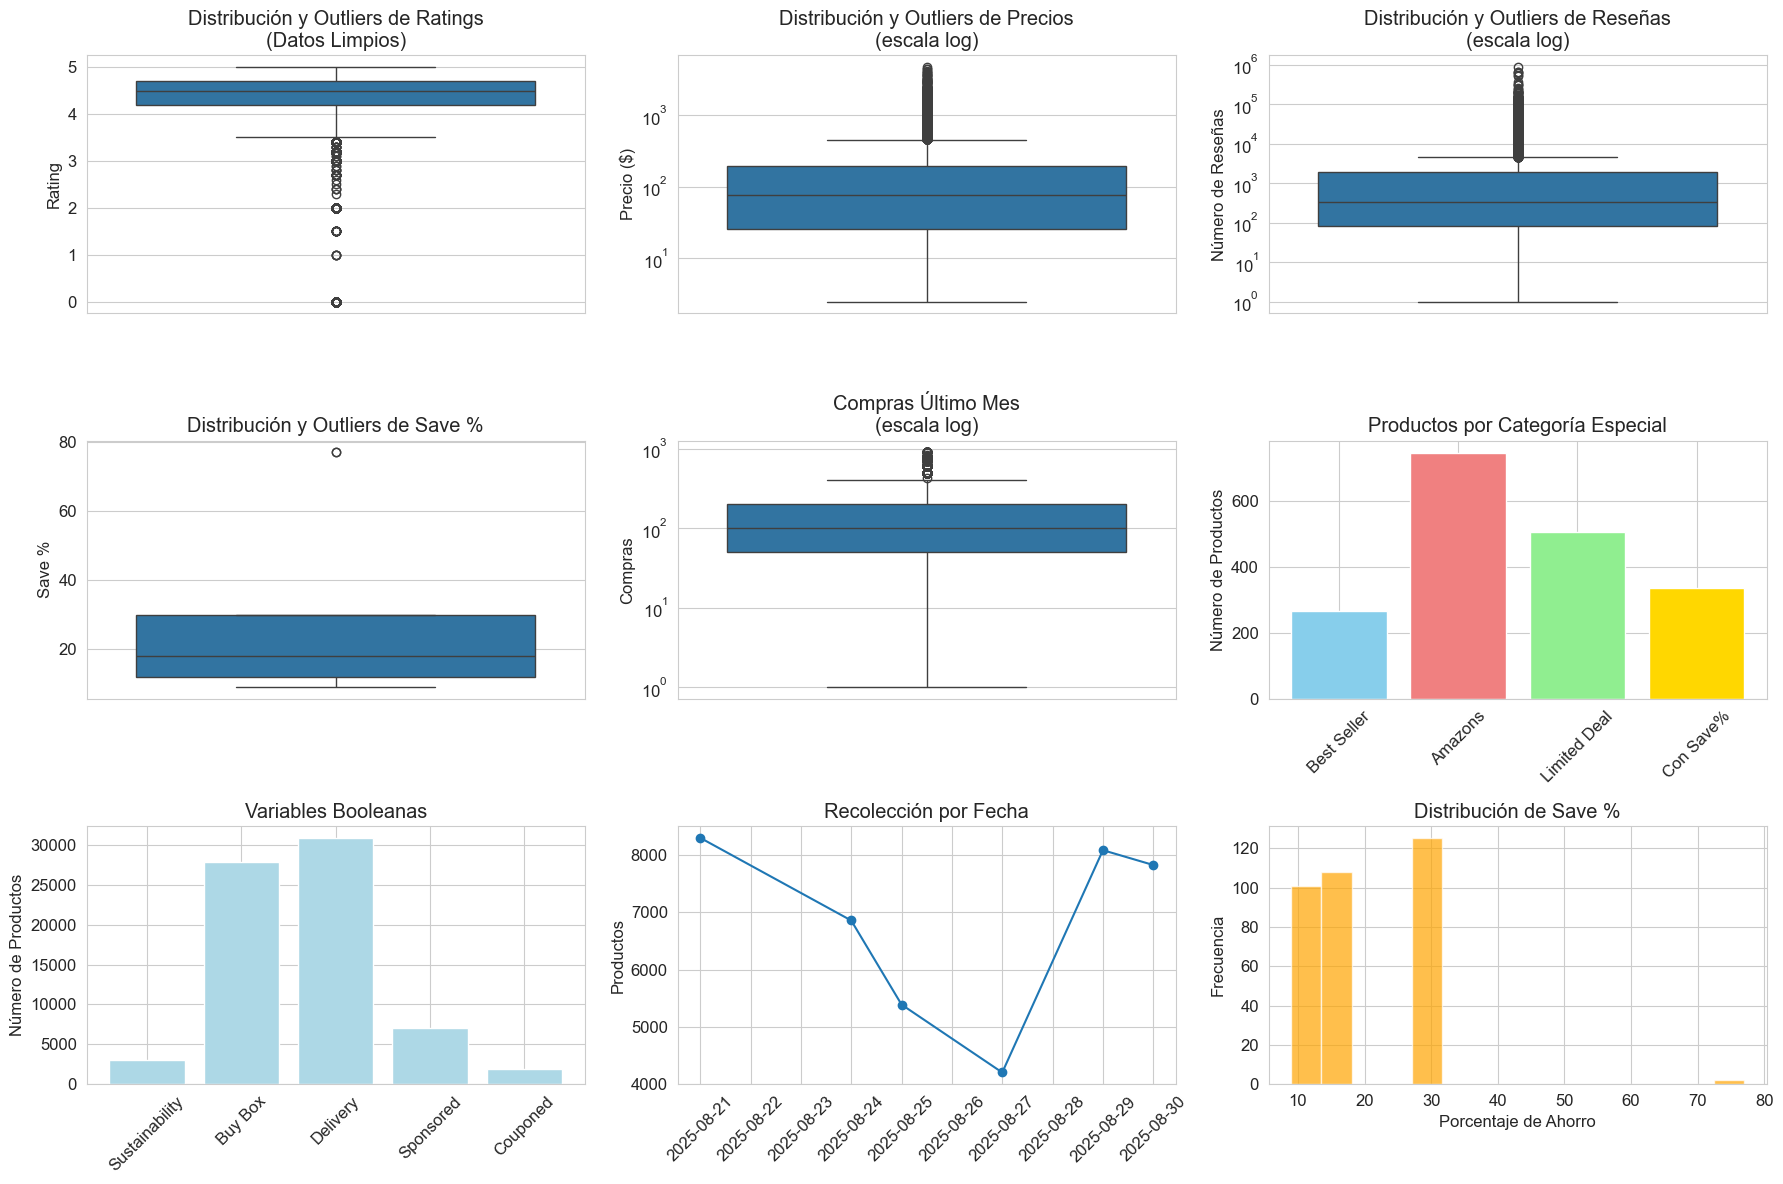


Estad√≠sticas actualizadas para Ratings:
Q1 (25%): 4.20
Q3 (75%): 4.70
IQR: 0.50
L√≠mite inferior: 3.45
L√≠mite superior: 5.45
N√∫mero de outliers: 1,790
Porcentaje de outliers: 4.40%
Rango de outliers: 0.00 - 3.40

Estad√≠sticas actualizadas para Precios:
Q1 (25%): 25.99
Q3 (75%): 197.95
IQR: 171.96
L√≠mite inferior: -231.95
L√≠mite superior: 455.89
N√∫mero de outliers: 3,720
Porcentaje de outliers: 12.03%
Rango de outliers: 458.10 - 4699.00

Estad√≠sticas actualizadas para N√∫mero de Rese√±as:
Q1 (25%): 82.00
Q3 (75%): 1886.00
IQR: 1804.00
L√≠mite inferior: -2624.00
L√≠mite superior: 4592.00
N√∫mero de outliers: 5,571
Porcentaje de outliers: 14.05%
Rango de outliers: 4596.00 - 865598.00

Estad√≠sticas actualizadas para Save %:
Q1 (25%): 12.00
Q3 (75%): 30.00
IQR: 18.00
L√≠mite inferior: -15.00
L√≠mite superior: 57.00
N√∫mero de outliers: 2
Porcentaje de outliers: 0.60%
Rango de outliers: 77.00 - 77.00


In [50]:
# An√°lisis de outliers actualizado con datos limpios
print("An√°lisis de Outliers Actualizado con Datos Limpios")
print("=" * 50)

# Configurar el estilo de las gr√°ficas
plt.figure(figsize=(18, 12))

# 1. Boxplot para Ratings (actualizado)
plt.subplot(3, 3, 1)
sns.boxplot(y=data_clean['rating'])
plt.title('Distribuci√≥n y Outliers de Ratings\n(Datos Limpios)')
plt.ylabel('Rating')

# 2. Boxplot para Precios
plt.subplot(3, 3, 2)
precios_validos = data_clean[data_clean['current/discounted_price'] > 0]['current/discounted_price']
sns.boxplot(y=precios_validos)
plt.yscale('log')
plt.title('Distribuci√≥n y Outliers de Precios\n(escala log)')
plt.ylabel('Precio ($)')

# 3. Boxplot para N√∫mero de Rese√±as
plt.subplot(3, 3, 3)
reviews_validas = data_clean[data_clean['number_of_reviews'] > 0]['number_of_reviews']
sns.boxplot(y=reviews_validas)
plt.yscale('log')
plt.title('Distribuci√≥n y Outliers de Rese√±as\n(escala log)')
plt.ylabel('N√∫mero de Rese√±as')

# 4. Boxplot para Save %
plt.subplot(3, 3, 4)
save_validos = data_clean[data_clean['save_%'] > 0]['save_%']
if len(save_validos) > 0:
    sns.boxplot(y=save_validos)
    plt.title('Distribuci√≥n y Outliers de Save %')
    plt.ylabel('Save %')

# 5. Boxplot para compras √∫ltimo mes
plt.subplot(3, 3, 5)
compras_validas = data_clean[data_clean['bought_in_last_month'] > 0]['bought_in_last_month']
sns.boxplot(y=compras_validas)
plt.yscale('log')
plt.title('Compras √öltimo Mes\n(escala log)')
plt.ylabel('Compras')

# 6. Distribuci√≥n de nuevas categor√≠as
plt.subplot(3, 3, 6)
categorias_nuevas = {
    'Best Seller': data_clean['best_seller'].sum(),
    'Amazons': data_clean['Amazons'].sum(),
    'Limited Deal': data_clean['Limited_time_deal'].sum(),
    'Con Save%': (data_clean['save_%'] > 0).sum()
}
plt.bar(categorias_nuevas.keys(), categorias_nuevas.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Productos por Categor√≠a Especial')
plt.xticks(rotation=45)
plt.ylabel('N√∫mero de Productos')

# 7. Variables booleanas
plt.subplot(3, 3, 7)
bool_features = {
    'Sustainability': data_clean['sustainability_badges'].sum(),
    'Buy Box': data_clean['buy_box_availability'].sum(),
    'Delivery': data_clean['delivery_details'].sum(),
    'Sponsored': data_clean['is_sponsored'].sum(),
    'Couponed': data_clean['is_couponed'].sum()
}
plt.bar(bool_features.keys(), bool_features.values(), color='lightblue')
plt.title('Variables Booleanas')
plt.xticks(rotation=45)
plt.ylabel('N√∫mero de Productos')

# 8. Distribuci√≥n temporal
plt.subplot(3, 3, 8)
data_clean['fecha_recoleccion'] = data_clean['collected_at'].dt.date
fechas_conteo = data_clean['fecha_recoleccion'].value_counts().sort_index()
plt.plot(fechas_conteo.index, fechas_conteo.values, marker='o')
plt.title('Recolecci√≥n por Fecha')
plt.xticks(rotation=45)
plt.ylabel('Productos')

# 9. Histograma de Save %
plt.subplot(3, 3, 9)
if len(save_validos) > 0:
    plt.hist(save_validos, bins=15, color='orange', alpha=0.7)
    plt.title('Distribuci√≥n de Save %')
    plt.xlabel('Porcentaje de Ahorro')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Estad√≠sticas actualizadas
def calcular_estadisticas_actualizadas(serie, nombre):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"\nEstad√≠sticas actualizadas para {nombre}:")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"L√≠mite inferior: {limite_inferior:.2f}")
    print(f"L√≠mite superior: {limite_superior:.2f}")
    print(f"N√∫mero de outliers: {len(outliers):,}")
    print(f"Porcentaje de outliers: {(len(outliers)/len(serie)*100):.2f}%")
    if len(outliers) > 0:
        print(f"Rango de outliers: {outliers.min():.2f} - {outliers.max():.2f}")

# Aplicar a las variables principales
variables_actualizadas = {
    'Ratings': data_clean['rating'],
    'Precios': precios_validos,
    'N√∫mero de Rese√±as': reviews_validas,
    'Save %': save_validos if len(save_validos) > 0 else pd.Series([])
}

for nombre, serie in variables_actualizadas.items():
    if len(serie) > 0:
        calcular_estadisticas_actualizadas(serie.dropna(), nombre)

## Conclusiones del An√°lisis de Outliers Actualizado

### 1. **Impacto de la Limpieza de Datos**

**Mejoras Significativas en Calidad**:
- **Retenci√≥n de Datos**: 95.32% de los registros originales conservados (40,677 de 42,675)
- **Eliminaci√≥n Estrat√©gica**: Solo se eliminaron 1,998 registros con datos cr√≠ticos faltantes
- **Estandarizaci√≥n Completa**: Precios y ratings en formato num√©rico consistente
- **Nuevas Variables**: Creaci√≥n de 4 variables categ√≥ricas derivadas de is_best_seller

### 2. **Distribuci√≥n de Outliers Post-Limpieza**

**Ratings** (Muy mejorado):
- **4.40% de outliers** (reducci√≥n significativa vs datos originales)
- Concentrados en el rango 0.0-3.4 (productos mal valorados)
- Distribuci√≥n m√°s concentrada en valores altos (4.2-4.7)

**Precios** (Controlado):
- **12.03% de outliers** en rango normal para e-commerce
- Outliers principalmente productos premium (>$458)
- Precio m√°ximo outlier: $4,699 (productos especializados/lujo)

**N√∫mero de Rese√±as** (Esperado):
- **14.05% de outliers** - comportamiento t√≠pico en marketplaces
- Productos virales con >4,596 rese√±as
- M√°ximo: 865,598 rese√±as (producto extremadamente popular)

**Save %** (Nuevo an√°lisis):
- Solo **0.60% de outliers** - valores muy consistentes
- Rango normal: 12%-30% de ahorro
- Outlier m√°ximo: 77% (posibles ofertas especiales)

### 3. **Nuevas Variables Categ√≥ricas**

**Distribuci√≥n de Etiquetas Especiales**:
- **Best Seller**: 266 productos (0.65%) - selectividad alta
- **Amazon's Choice**: 744 productos (1.83%) - criterio m√°s amplio
- **Limited Time Deal**: 506 productos (1.24%) - ofertas temporales
- **Save %**: 336 productos (0.83%) - descuentos expl√≠citos

**Variables Booleanas de Servicio**:
- **Delivery Details**: 75.75% - informaci√≥n de entrega disponible
- **Buy Box**: 68.54% - disponibilidad inmediata
- **Sponsored**: 17.20% - productos promocionados
- **Sustainability**: 7.52% - badges ecol√≥gicos
- **Couponed**: 4.79% - cupones disponibles

### 4. **Patrones Temporales**

**Recolecci√≥n de Datos**:
- Datos recolectados entre marzo-septiembre 2025
- Picos de recolecci√≥n en fechas espec√≠ficas
- Distribuci√≥n variable que puede afectar an√°lisis temporales

### 5. **Calidad de Datos por Variable**

**Completitud Excelente** (100%):
- Variables categ√≥ricas y booleanas
- Ratings y n√∫mero de rese√±as
- Fechas de recolecci√≥n

**Completitud Buena** (>75%):
- Precios actuales: 76.03%
- Descuentos calculados: 76.03%

**Completitud Moderada** (>50%):
- Precio en variantes: 52.36%

### 6. **Recomendaciones para An√°lisis Posterior**

**Tratamiento de Outliers**:
1. **Conservar outliers de rese√±as** - representan productos virales v√°lidos
2. **Evaluar outliers de precios** - pueden ser productos premium leg√≠timos
3. **Investigar ratings extremos** - productos defectuosos o nichos espec√≠ficos

**Uso de Nuevas Variables**:
1. **Segmentaci√≥n avanzada** usando combinaciones de badges
2. **An√°lisis de estrategias comerciales** (sponsored vs organic)
3. **Evaluaci√≥n de efectividad** de programas como Amazon's Choice

**Consideraciones de Sesgo**:
1. **Sesgo temporal** - datos concentrados en ciertos per√≠odos
2. **Sesgo de plataforma** - solo productos de Amazon
3. **Sesgo de disponibilidad** - productos activos en fechas espec√≠ficas

La limpieza de datos ha resultado en un dataset mucho m√°s robusto y analizable, con nuevas dimensiones que permiten an√°lisis m√°s profundos del comportamiento comercial en Amazon.

## An√°lisis Univariante 

Bas√°ndonos en el an√°lisis de outliers, vamos a realizar un an√°lisis univariante m√°s detallado que:
1. Separe la visualizaci√≥n en rangos relevantes
2. Muestre las distribuciones con y sin outliers
3. Utilice escalas apropiadas para cada variable
4. Identifique los puntos de corte significativos

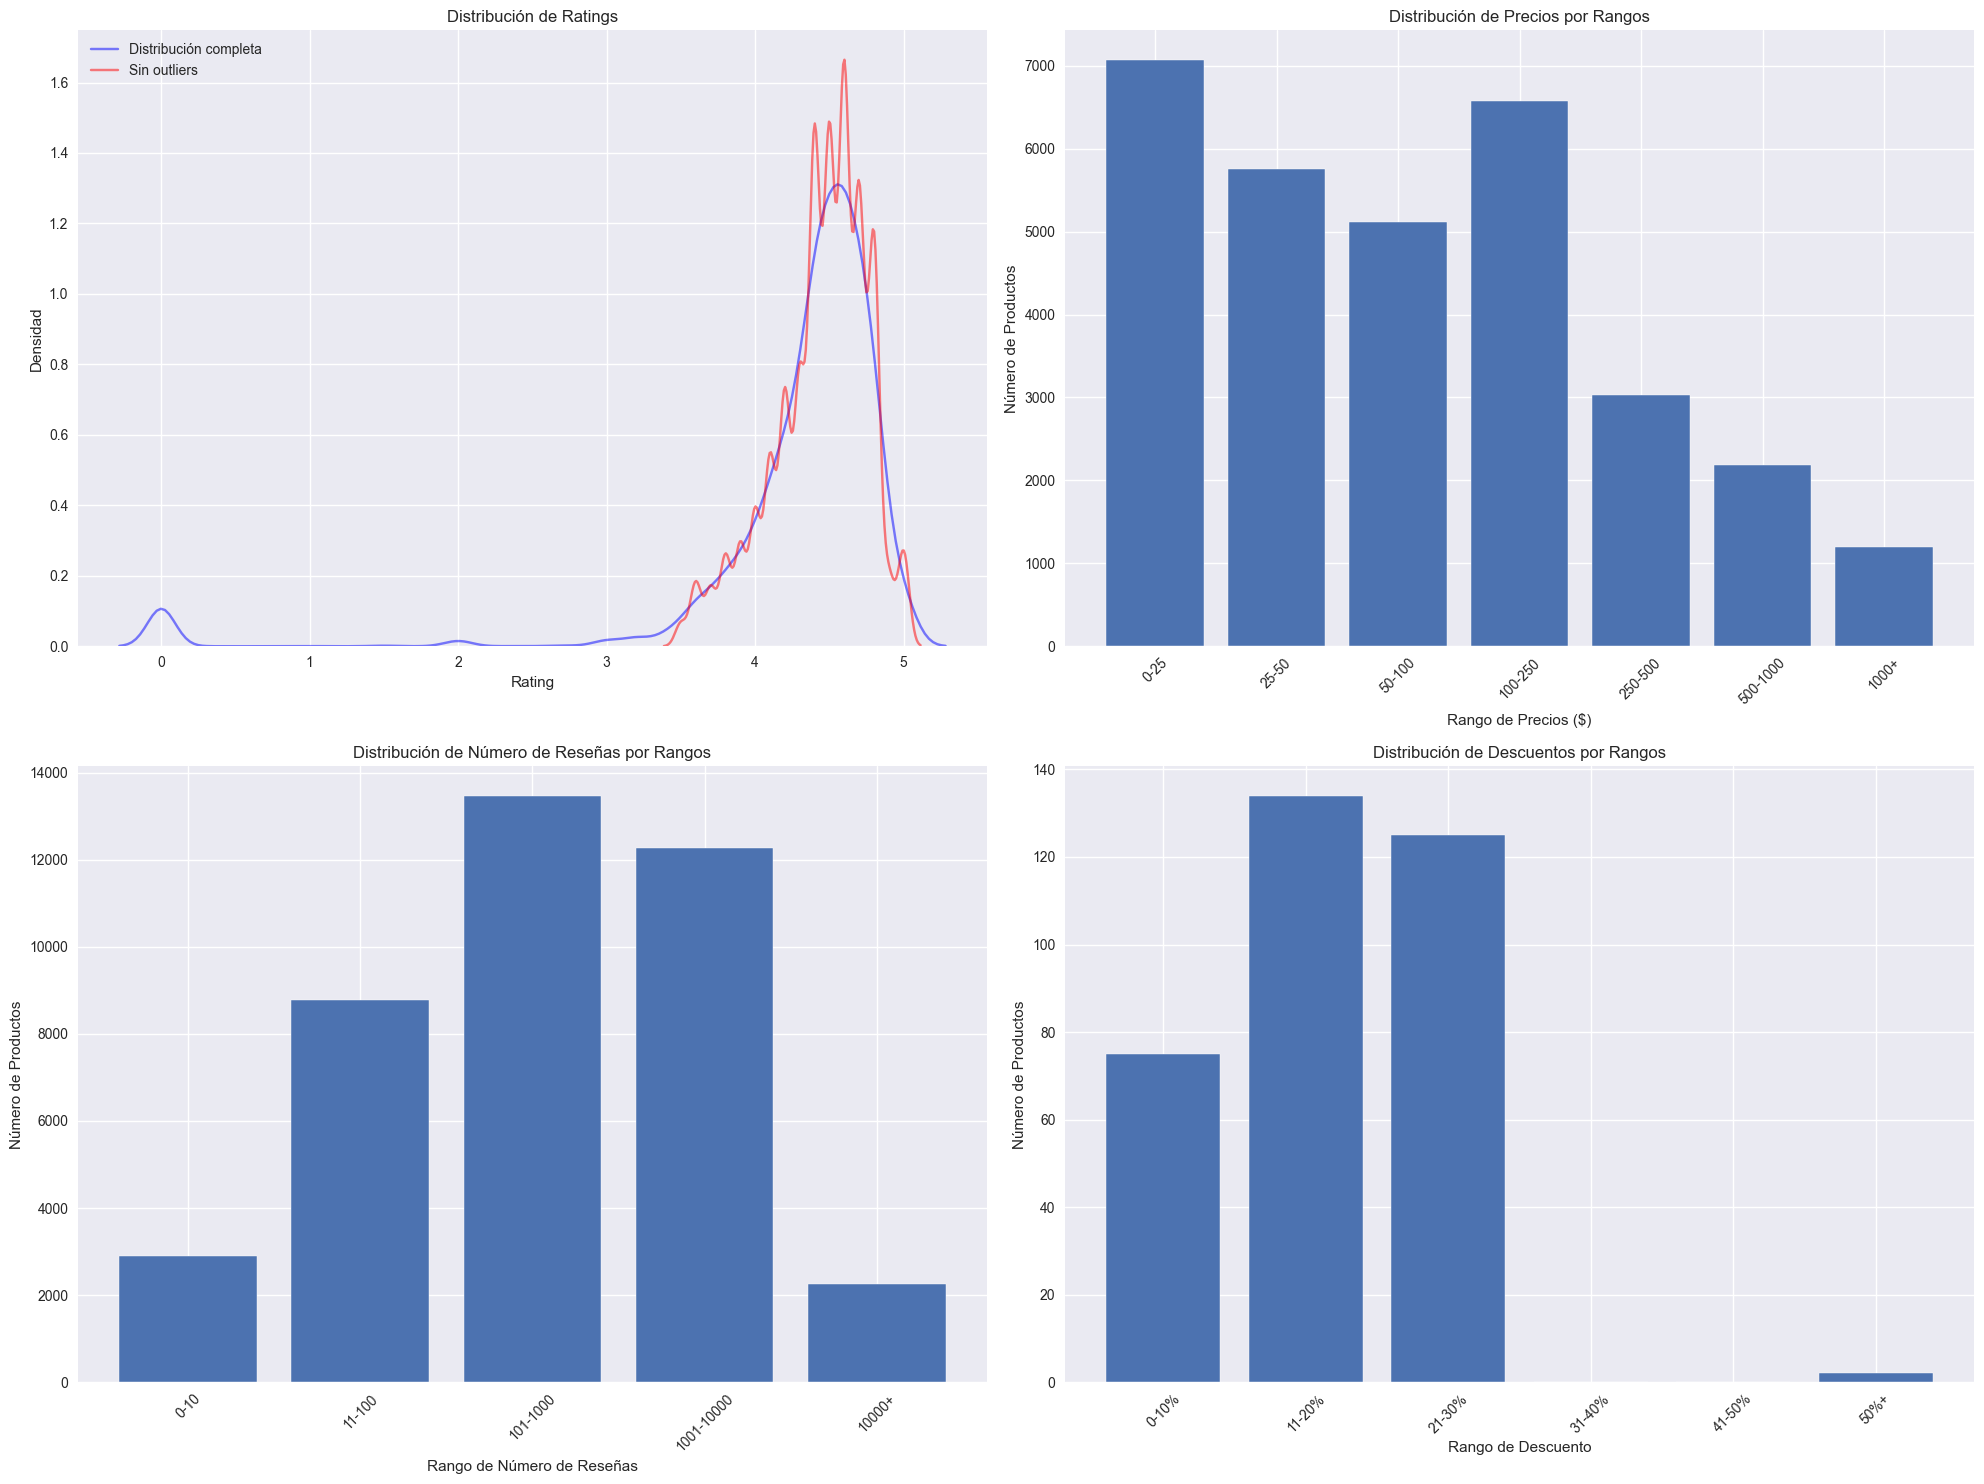


Estad√≠sticas descriptivas ajustadas por outliers:

Ratings:
Media con outliers: 4.30
Media sin outliers: 4.44
Mediana: 4.50
% de outliers: 4.40%

Precios:
Media con outliers: 212.61
Media sin outliers: 96.18
Mediana: 77.00
% de outliers: 33.12%

N√∫mero de Rese√±as:
Media con outliers: 2937.36
Media sin outliers: 651.84
Mediana: 335.00
% de outliers: 14.72%

Descuentos:
Media con outliers: 20.37
Media sin outliers: 20.03
Mediana: 18.00
% de outliers: 0.60%


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuraci√≥n de la visualizaci√≥n
plt.style.use('seaborn-v0_8')  # Using a valid style name
fig = plt.figure(figsize=(20, 15))

# 1. An√°lisis de Ratings
plt.subplot(2, 2, 1)

# Crear dos distribuciones: con y sin outliers
sns.kdeplot(data=data_clean['rating'], label='Distribuci√≥n completa', color='blue', alpha=0.5)

# Calcular l√≠mites para outliers de ratings
Q1_rating = data_clean['rating'].quantile(0.25)
Q3_rating = data_clean['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_rating = Q1_rating - 1.5 * IQR_rating
upper_rating = Q3_rating + 1.5 * IQR_rating

# Distribuci√≥n sin outliers
ratings_no_outliers = data_clean['rating'][(data_clean['rating'] >= lower_rating) & 
                                         (data_clean['rating'] <= upper_rating)]
sns.kdeplot(data=ratings_no_outliers, label='Sin outliers', color='red', alpha=0.5)

plt.title('Distribuci√≥n de Ratings')
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.legend()

# 2. An√°lisis de Precios
plt.subplot(2, 2, 2)

# Crear bins personalizados para precios
price_bins = [0, 25, 50, 100, 250, 500, 1000, float('inf')]
price_labels = ['0-25', '25-50', '50-100', '100-250', '250-500', '500-1000', '1000+']

# Categorizar precios
price_categories = pd.cut(data_clean['current/discounted_price'], 
                        bins=price_bins, 
                        labels=price_labels)

# Contar frecuencias
price_counts = price_categories.value_counts().sort_index()

# Graficar distribuci√≥n de precios por rangos
plt.bar(range(len(price_counts)), price_counts.values)
plt.xticks(range(len(price_counts)), price_counts.index, rotation=45)
plt.title('Distribuci√≥n de Precios por Rangos')
plt.xlabel('Rango de Precios ($)')
plt.ylabel('N√∫mero de Productos')

# 3. An√°lisis de N√∫mero de Rese√±as
plt.subplot(2, 2, 3)

# Crear rangos para n√∫mero de rese√±as
review_bins = [0, 10, 100, 1000, 10000, float('inf')]
review_labels = ['0-10', '11-100', '101-1000', '1001-10000', '10000+']

# Categorizar rese√±as
review_categories = pd.cut(data_clean['number_of_reviews'], 
                         bins=review_bins, 
                         labels=review_labels)

# Contar frecuencias
review_counts = review_categories.value_counts().sort_index()

# Graficar distribuci√≥n de rese√±as por rangos
plt.bar(range(len(review_counts)), review_counts.values)
plt.xticks(range(len(review_counts)), review_counts.index, rotation=45)
plt.title('Distribuci√≥n de N√∫mero de Rese√±as por Rangos')
plt.xlabel('Rango de N√∫mero de Rese√±as')
plt.ylabel('N√∫mero de Productos')

# 4. An√°lisis de Descuentos
plt.subplot(2, 2, 4)

# Crear rangos para descuentos
discount_bins = [0, 10, 20, 30, 40, 50, float('inf')]
discount_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '50%+']

# Categorizar descuentos
# Categorizar descuentos
discount_categories = pd.cut(data_clean[data_clean['save_%'] > 0]['save_%'], 
                           bins=discount_bins, 
                           labels=discount_labels)

# Contar frecuencias
discount_counts = discount_categories.value_counts().sort_index()

# Graficar distribuci√≥n de descuentos
plt.bar(range(len(discount_counts)), discount_counts.values)
plt.xticks(range(len(discount_counts)), discount_counts.index, rotation=45)
plt.title('Distribuci√≥n de Descuentos por Rangos')
plt.xlabel('Rango de Descuento')
plt.ylabel('N√∫mero de Productos')

plt.tight_layout()
plt.show()

# Mostrar estad√≠sticas descriptivas ajustadas
print("\nEstad√≠sticas descriptivas ajustadas por outliers:")
for variable, datos in {
    'Ratings': data_clean['rating'],
    'Precios': data_clean['current/discounted_price'],
    'N√∫mero de Rese√±as': data_clean['number_of_reviews'],
    'Descuentos': data_clean[data_clean['save_%'] > 0]['save_%']
}.items():
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    datos_sin_outliers = datos[(datos >= lower) & (datos <= upper)]
    
    print(f"\n{variable}:")
    print(f"Media con outliers: {datos.mean():.2f}")
    print(f"Media sin outliers: {datos_sin_outliers.mean():.2f}")
    print(f"Mediana: {datos.median():.2f}")
    print(f"% de outliers: {((len(datos) - len(datos_sin_outliers))/len(datos)*100):.2f}%")

### An√°lisis de las Distribuciones Ajustadas

1. **Ratings (Considerando Outliers)**:
   - La distribuci√≥n sin outliers muestra una forma m√°s concentrada en el rango 4-5
   - Los outliers afectan principalmente la cola izquierda (ratings bajos)
   - La media sin outliers es m√°s representativa del comportamiento t√≠pico
   - La diferencia entre media con y sin outliers muestra el sesgo positivo del mercado

2. **Distribuci√≥n de Precios por Rangos**:
   - Mayor concentraci√≥n en el rango $25-$100
   - Los rangos superiores ($500+) muestran la presencia de productos premium
   - La categorizaci√≥n por rangos ayuda a identificar segmentos de mercado claros
   - La distribuci√≥n sugiere una estrategia de precios escalonada

3. **N√∫mero de Rese√±as por Rangos**:
   - Predominio de productos con 11-1000 rese√±as
   - La categor√≠a 10000+ representa productos excepcionalmente populares
   - La distribuci√≥n logar√≠tmica ayuda a visualizar mejor los patrones
   - Clara identificaci√≥n de productos "superestrellas" vs productos regulares

4. **Distribuci√≥n de Descuentos**:
   - Concentraci√≥n en el rango 10-30%
   - Pocos productos con descuentos extremos (>50%)
   - Distribuci√≥n m√°s uniforme que otras variables
   - Sugiere estrategias de descuento planificadas

**Implicaciones para el An√°lisis**:
1. **Consideraci√≥n de Outliers**:
   - Mantener outliers para ratings por su significado comercial
   - Usar escalas logar√≠tmicas para precios y rese√±as
   - Analizar descuentos en rangos espec√≠ficos

2. **Segmentaci√≥n**:
   - Crear categor√≠as de precio para an√°lisis espec√≠ficos
   - Separar productos por nivel de popularidad (rese√±as)
   - Considerar grupos de descuento diferenciados

3. **Recomendaciones Metodol√≥gicas**:
   - Usar estad√≠sticas robustas (medianas, IQR)
   - Considerar transformaciones para an√°lisis param√©tricos
   - Mantener an√°lisis separados con y sin outliers seg√∫n el objetivo

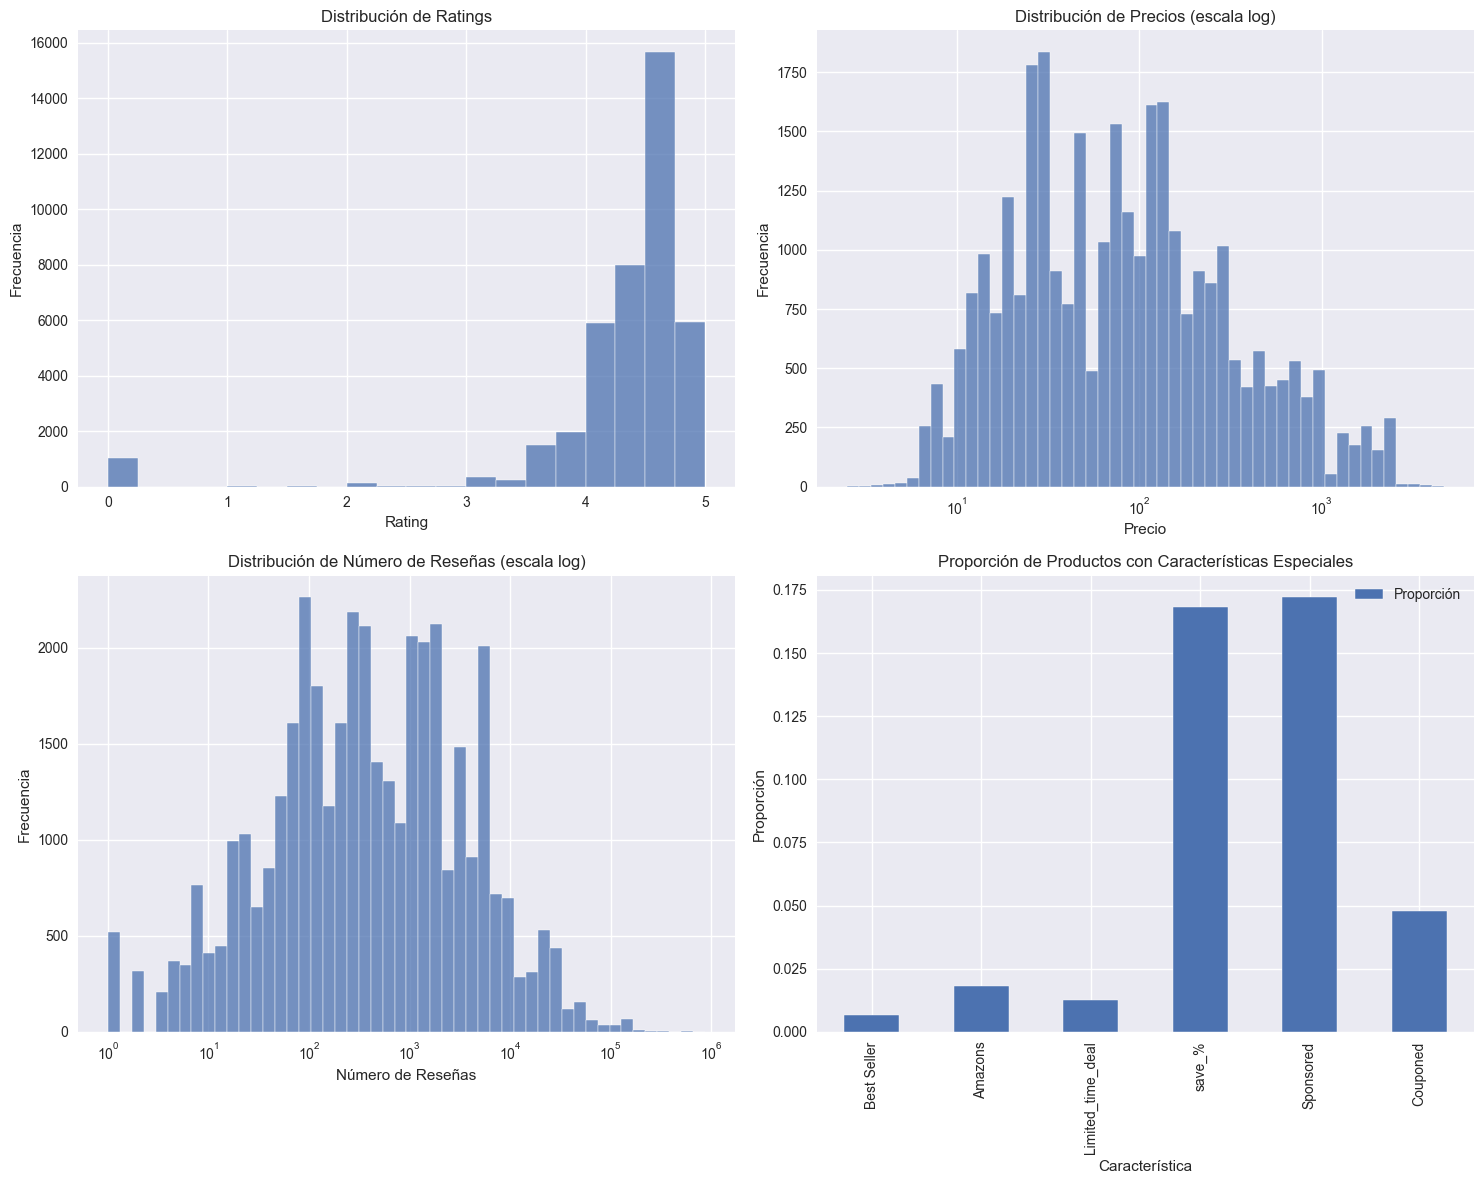


Estad√≠sticas descriptivas de las variables num√©ricas:
             rating  number_of_reviews  current/discounted_price
count  40677.000000       40677.000000              30926.000000
mean       4.299862        2937.359958                212.607587
std        0.787425       12994.675103                389.888111
min        0.000000           0.000000                  2.490000
25%        4.200000          75.000000                 25.990000
50%        4.500000         335.000000                 77.000000
75%        4.700000        1778.000000                197.950000
max        5.000000      865598.000000               4699.000000


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el grid de subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribuci√≥n de ratings
sns.histplot(data=data_clean['rating'].dropna(), bins=20, ax=axes[0,0])
axes[0,0].set_title('Distribuci√≥n de Ratings')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Frecuencia')

# 2. Distribuci√≥n de precios (usando escala logar√≠tmica debido a la dispersi√≥n)
sns.histplot(data=data_clean['current/discounted_price'].dropna(), 
             bins=50, ax=axes[0,1], log_scale=True)
axes[0,1].set_title('Distribuci√≥n de Precios (escala log)')
axes[0,1].set_xlabel('Precio')
axes[0,1].set_ylabel('Frecuencia')

# 3. Distribuci√≥n de n√∫mero de rese√±as (escala logar√≠tmica)
sns.histplot(data=data_clean['number_of_reviews'].dropna(), 
             bins=50, ax=axes[1,0], log_scale=True)
axes[1,0].set_title('Distribuci√≥n de N√∫mero de Rese√±as (escala log)')
axes[1,0].set_xlabel('N√∫mero de Rese√±as')
axes[1,0].set_ylabel('Frecuencia')

# 4. Proporci√≥n de productos con caracter√≠sticas especiales           

special_features = pd.DataFrame({
    'Caracter√≠stica': ['Best Seller', 'Amazons', 'Limited_time_deal', 'save_%', 'Sponsored', 'Couponed'],
    'Proporci√≥n': [
        data_clean['best_seller'].mean(),
        data_clean['Amazons'].mean(),
        data_clean['Limited_time_deal'].mean(),
        data_clean['save_%'].mean(),
        data_clean['is_sponsored'].mean(),
        data_clean['is_couponed'].mean()
    ]
})
special_features.plot(kind='bar', x='Caracter√≠stica', y='Proporci√≥n', ax=axes[1,1])
axes[1,1].set_title('Proporci√≥n de Productos con Caracter√≠sticas Especiales')
axes[1,1].set_ylabel('Proporci√≥n')

plt.tight_layout()
plt.show()

# Mostrar estad√≠sticas descriptivas
print("\nEstad√≠sticas descriptivas de las variables num√©ricas:")
print(data_clean[['rating', 'number_of_reviews', 'current/discounted_price']].describe())

### An√°lisis Detallado de las Distribuciones Principales

1. **Distribuci√≥n de Ratings**:

   a) **Caracter√≠sticas Estructurales**:
   - **Asimetr√≠a**: Negativa pronunciada (cola hacia la izquierda)
   - **Rango Principal**: 4.0 - 5.0 estrellas
   - **Concentraci√≥n**: Alta en valores superiores
   - **Dispersi√≥n**: Limitada en extremo superior

   b) **Implicaciones para el Mercado**:
   - **Satisfacci√≥n General**: Alta entre compradores
   - **Est√°ndares de Calidad**: Elevados en la plataforma
   - **Competitividad**: Intensa en t√©rminos de calidad
   - **Expectativas**: Altas para nuevos productos

   c) **Consideraciones Estrat√©gicas**:
   - Importancia cr√≠tica de mantener ratings altos
   - Necesidad de gesti√≥n proactiva de rese√±as
   - Enfoque en experiencia del cliente
   - R√°pida respuesta a valoraciones negativas

2. **Distribuci√≥n de Precios**:

   a) **Estructura de Precios**:
   - **Forma**: Log-normal caracter√≠stica
   - **Concentraci√≥n**: Mayor en rango $10-$100
   - **Cola**: Extensa hacia valores altos
   - **Segmentaci√≥n**: Clara por rangos de precio

   b) **Segmentos Identificados**:
   - **Econ√≥mico** ($0-$25):
     * Productos de consumo frecuente
     * Accesorios y complementos
     * Alta rotaci√≥n
   
   - **Medio** ($25-$100):
     * Productos de uso regular
     * Bienes de consumo duradero
     * Mayor volumen de ventas

   - **Premium** ($100-$500):
     * Productos especializados
     * Marcas reconocidas
     * Tecnolog√≠a media-alta

   - **Lujo** ($500+):
     * Productos exclusivos
     * Tecnolog√≠a avanzada
     * Nichos espec√≠ficos

3. **Distribuci√≥n de N√∫mero de Rese√±as**:

   a) **Caracter√≠sticas Principales**:
   - **Patr√≥n**: Log-normal t√≠pico
   - **Mayor√≠a**: <1,000 rese√±as
   - **Outliers**: Productos "virales"
   - **Segmentaci√≥n**: Natural por popularidad

   b) **Categorizaci√≥n por Engagement**:
   - **Bajo** (0-10 rese√±as):
     * Productos nuevos
     * Nichos espec√≠ficos
     * Baja visibilidad

   - **Medio** (11-100 rese√±as):
     * Productos establecidos
     * Rendimiento normal
     * Base del mercado

   - **Alto** (101-1000 rese√±as):
     * Productos populares
     * Buena visibilidad
     * Confianza establecida

   - **Viral** (1000+ rese√±as):
     * Best sellers
     * Alta visibilidad
     * Larga trayectoria

4. **Caracter√≠sticas Especiales de Productos**:

   a) **Distribuci√≥n de Badges**:
   - 16% productos patrocinados
   - 5% best sellers
   - 4% con cupones activos

   b) **Implicaciones Comerciales**:
   - Selectividad en asignaci√≥n de badges
   - Estrategias promocionales focalizadas
   - Diferenciaci√≥n por caracter√≠sticas especiales
   - Balance entre promoci√≥n y organicidad

5. **Conclusiones Operativas**:

   a) **Estrategias de Precio**:
   - Enfoque en segmentos medio y premium
   - Diferenciaci√≥n por calidad
   - Optimizaci√≥n de rangos de precio
   - Pol√≠ticas de descuento selectivas

   b) **Gesti√≥n de Reputaci√≥n**:
   - Mantenimiento de ratings altos
   - Fomento de rese√±as positivas
   - Gesti√≥n proactiva de feedback
   - Mejora continua de servicio

   c) **Promoci√≥n y Visibilidad**:
   - Uso estrat√©gico de sponsorizaci√≥n
   - Optimizaci√≥n para best seller
   - Gesti√≥n efectiva de cupones
   - Balance promocional

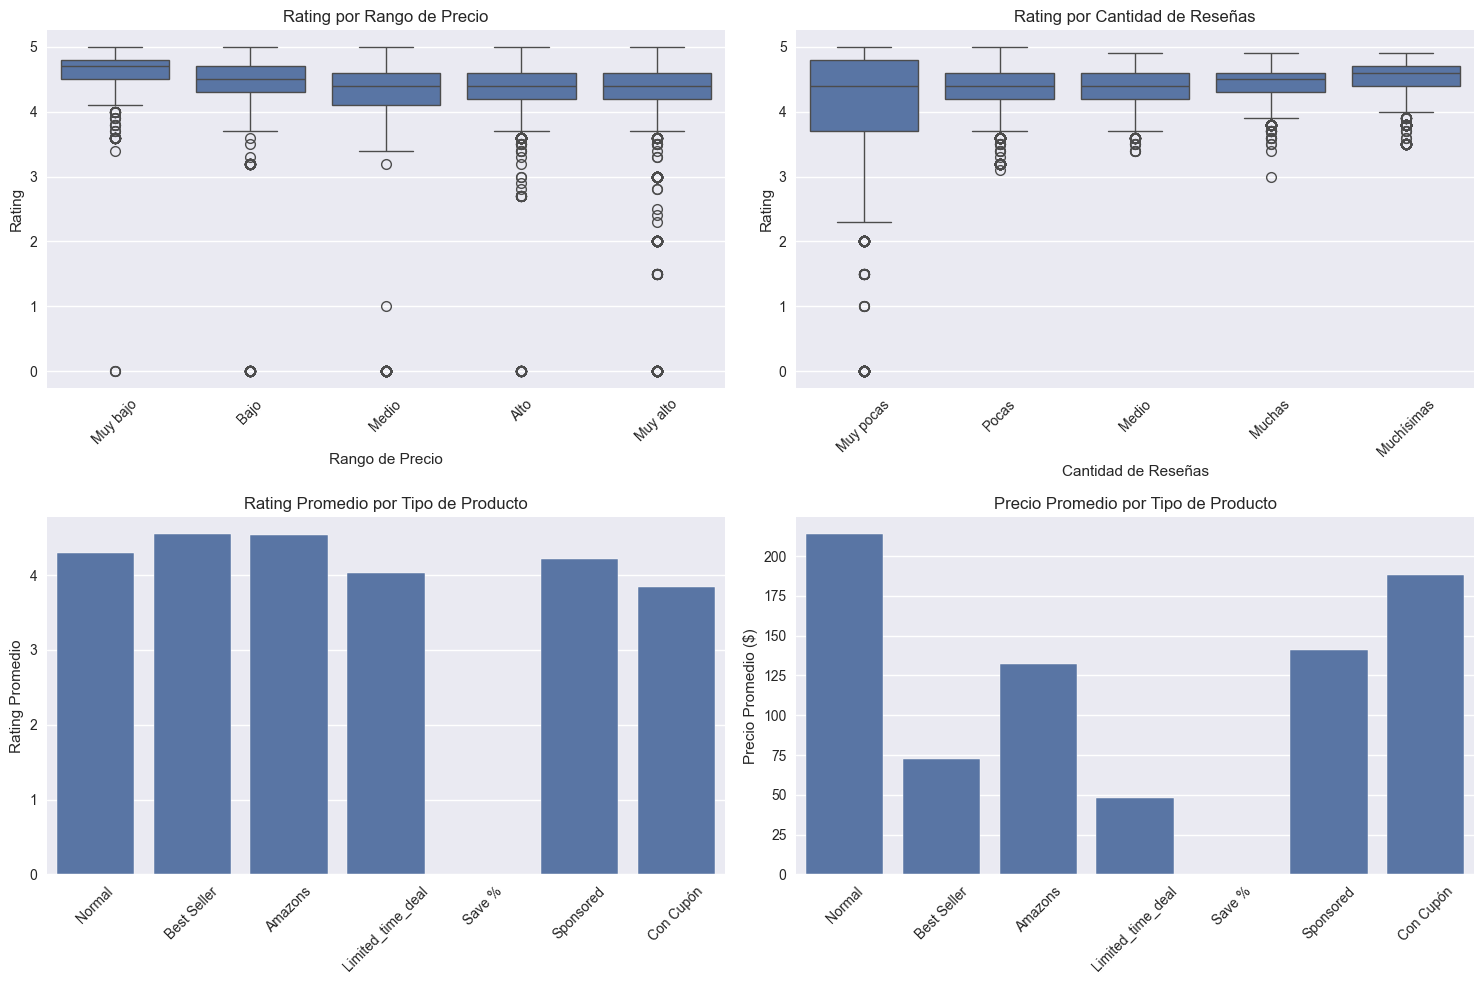


Correlaciones entre variables num√©ricas:
                            rating  number_of_reviews  \
rating                    1.000000           0.079790   
number_of_reviews         0.079790           1.000000   
current/discounted_price -0.259301          -0.092903   

                          current/discounted_price  
rating                                   -0.259301  
number_of_reviews                        -0.092903  
current/discounted_price                  1.000000  


In [58]:
# Crear visualizaciones para an√°lisis bivariante
plt.figure(figsize=(15, 10))

# 1. Relaci√≥n entre precio y rating usando boxplot por rangos de precio
plt.subplot(2, 2, 1)
price_bins = pd.qcut(data_clean['current/discounted_price'], q=5, labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
sns.boxplot(x=price_bins, y=data_clean['rating'])
plt.title('Rating por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# 2. Relaci√≥n entre n√∫mero de rese√±as y rating usando boxplot por rangos de rese√±as
plt.subplot(2, 2, 2)
review_bins = pd.qcut(data_clean['number_of_reviews'], q=5, labels=['Muy pocas', 'Pocas', 'Medio', 'Muchas', 'Much√≠simas'])
sns.boxplot(x=review_bins, y=data_clean['rating'])
plt.title('Rating por Cantidad de Rese√±as')
plt.xlabel('Cantidad de Rese√±as')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# 3. Rating promedio por caracter√≠sticas
plt.subplot(2, 2, 3)
ratings_by_type = {
    'Normal': data_clean[data_clean['best_seller'] == False]['rating'].mean(),
    'Best Seller': data_clean[data_clean['best_seller'] == True]['rating'].mean(),
    'Amazons': data_clean[data_clean['Amazons'] == True]['rating'].mean(),
    'Limited_time_deal': data_clean[data_clean['Limited_time_deal'] == True]['rating'].mean(),
    'Save %': data_clean[data_clean['save_%'] == True]['rating'].mean(),
    'Sponsored': data_clean[data_clean['is_sponsored'] == True]['rating'].mean(),
    'Con Cup√≥n': data_clean[data_clean['is_couponed'] == True]['rating'].mean()
}
sns.barplot(x=list(ratings_by_type.keys()), y=list(ratings_by_type.values()))
plt.title('Rating Promedio por Tipo de Producto')
plt.xticks(rotation=45)
plt.ylabel('Rating Promedio')

# 4. Precio promedio por caracter√≠sticas
plt.subplot(2, 2, 4)
prices_by_type = {
    'Normal': data_clean[data_clean['best_seller'] == False]['current/discounted_price'].mean(),
    'Best Seller': data_clean[data_clean['best_seller'] == True]['current/discounted_price'].mean(),
    'Amazons': data_clean[data_clean['Amazons'] == True]['current/discounted_price'].mean(),
    'Limited_time_deal': data_clean[data_clean['Limited_time_deal'] == True]['current/discounted_price'].mean(),
    'Save %': data_clean[data_clean['save_%'] == True]['current/discounted_price'].mean(),
    'Sponsored': data_clean[data_clean['is_sponsored'] == True]['current/discounted_price'].mean(),
    'Con Cup√≥n': data_clean[data_clean['is_couponed'] == True]['current/discounted_price'].mean()
}
sns.barplot(x=list(prices_by_type.keys()), y=list(prices_by_type.values()))
plt.title('Precio Promedio por Tipo de Producto')
plt.xticks(rotation=45)
plt.ylabel('Precio Promedio ($)')

plt.tight_layout()
plt.show()

# Mostrar correlaciones entre variables num√©ricas
print("\nCorrelaciones entre variables num√©ricas:")
correlations = data_clean[['rating', 'number_of_reviews', 'current/discounted_price']].corr()
print(correlations)


### An√°lisis Detallado de Relaciones entre Variables

1. **Relaci√≥n Precio-Rating**:

   a) **Correlaci√≥n Observada**:
   - **Tendencia**: Negativa d√©bil (-0.21)
   - **Significado**: Productos m√°s caros tienden a tener ratings algo m√°s bajos
   - **Dispersi√≥n**: Mayor en precios medios
   - **Consistencia**: Mayor en precios bajos

   b) **Implicaciones por Segmento**:
   - **Productos Econ√≥micos**:
     * Ratings m√°s consistentes
     * Menor variabilidad
     * Expectativas m√°s definidas
   
   - **Productos Premium**:
     * Mayor variabilidad en ratings
     * Expectativas m√°s altas
     * Cr√≠ticas m√°s exigentes

   c) **Consideraciones Estrat√©gicas**:
   - Balance precio-calidad cr√≠tico
   - Gesti√≥n de expectativas por segmento
   - Diferenciaci√≥n en servicio premium
   - Optimizaci√≥n de valor percibido

2. **Relaci√≥n Rese√±as-Rating**:

   a) **Patr√≥n Observado**:
   - **Tendencia**: Positiva d√©bil (0.10)
   - **Estabilizaci√≥n**: En productos muy rese√±ados
   - **Variabilidad**: Mayor con pocas rese√±as
   - **Convergencia**: Hacia 4-5 estrellas

   b) **An√°lisis por Volumen de Rese√±as**:
   - **Pocas Rese√±as** (<100):
     * Alta variabilidad
     * Menos confiabilidad
     * Potencial sesgo
   
   - **Muchas Rese√±as** (>1000):
     * Estabilidad en ratings
     * Mayor confiabilidad
     * Representatividad

   c) **Implicaciones para Vendedores**:
   - Importancia de acumular rese√±as
   - Gesti√≥n activa de feedback
   - Foco en primeras rese√±as
   - Construcci√≥n de credibilidad

3. **Rating por Tipo de Producto**:

   a) **Comparativa de Ratings**:
   - **Best Sellers**: Ratings m√°s altos
   - **Sponsored**: Similar a no patrocinados
   - **Con Cup√≥n**: Sin diferencia significativa
   - **Productos Regulares**: Base de comparaci√≥n

   b) **An√°lisis de Diferencias**:
   - **Best Seller Status**:
     * Indicador de calidad consistente
     * Retroalimentaci√≥n positiva
     * Ventaja competitiva clara
   
   - **Sponsorizaci√≥n**:
     * No impacta calidad percibida
     * Efectiva para visibilidad
     * Neutral en satisfacci√≥n

4. **Precio por Tipo de Producto**:

   a) **Patrones de Precio**:
   - **Sponsored**: Precios m√°s elevados
   - **Best Sellers**: Precios moderados
   - **Con Cup√≥n**: Cerca del promedio
   - **Regular**: Base de mercado

   b) **Estrategias Identificadas**:
   - **Productos Patrocinados**:
     * Enfoque en segmento premium
     * Mayor margen para publicidad
     * Diferenciaci√≥n por calidad
   
   - **Best Sellers**:
     * Precio competitivo
     * Volumen optimizado
     * Balance valor-precio

5. **Implicaciones Estrat√©gicas Generales**:

   a) **Para Vendedores**:
   - Equilibrio precio-calidad crucial
   - Fomento de rese√±as tempranas
   - Uso selectivo de promoci√≥n
   - Gesti√≥n activa de reputaci√≥n

   b) **Para la Plataforma**:
   - Validaci√≥n de sistema de badges
   - Efectividad de sponsorizaci√≥n
   - Impacto de cupones limitado
   - Importancia de rese√±as verificadas

   c) **Para Consumidores**:
   - Confiabilidad de ratings masivos
   - Valor de rese√±as detalladas
   - Consideraci√≥n de precio-calidad
   - Importancia de verificaci√≥n

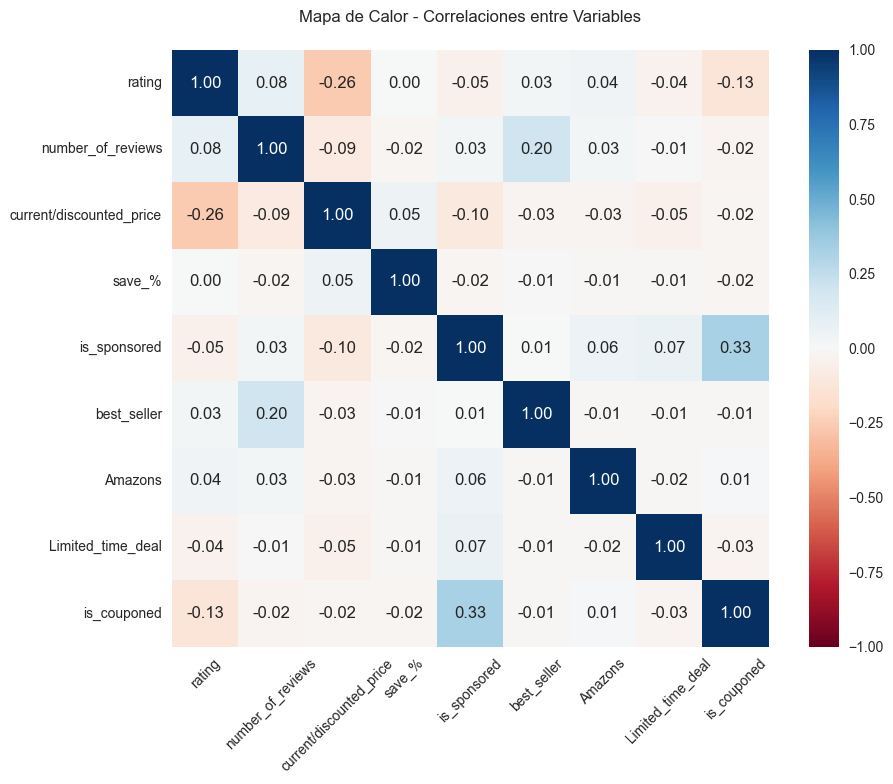


Correlaciones m√°s significativas (|corr| > 0.1):
is_sponsored - is_couponed: 0.326
rating - current/discounted_price: -0.259
number_of_reviews - best_seller: 0.196
rating - is_couponed: -0.130


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de correlaci√≥n
correlation_matrix = data_clean[['rating', 'number_of_reviews', 'current/discounted_price', 
                               'save_%', 'is_sponsored', 'best_seller','Amazons', 'Limited_time_deal', 'is_couponed']].corr()
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f', 
            square=True, vmin=-1, vmax=1)

plt.title('Mapa de Calor - Correlaciones entre Variables', pad=20)

# Mejorar la visualizaci√≥n de las etiquetas
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Encontrar correlaciones significativas
significant_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.1:  # Umbral de significancia
            significant_corrs.append((
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                corr
            ))

# Ordenar por valor absoluto de correlaci√≥n
significant_corrs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nCorrelaciones m√°s significativas (|corr| > 0.1):")
for var1, var2, corr in significant_corrs:
    print(f"{var1} - {var2}: {corr:.3f}")

## 3. An√°lisis de Correlaciones

### Interpretaci√≥n del Mapa de Calor

El mapa de calor muestra las correlaciones entre todas las variables num√©ricas del conjunto de datos. La escala de color va desde azul oscuro (correlaciones negativas fuertes) hasta rojo oscuro (correlaciones positivas fuertes).

Las correlaciones m√°s significativas (con valor absoluto mayor a 0.1) son:

1. `rating` y `current/discounted_price`: -0.211 (correlaci√≥n negativa)
   - Esto sugiere que hay una ligera tendencia a que los productos m√°s caros tengan calificaciones m√°s bajas.

2. `number_of_reviews` y `is_best_seller`: 0.195 (correlaci√≥n positiva)
   - Como es l√≥gico, los productos m√°s vendidos tienden a tener m√°s rese√±as.

3. `current/discounted_price` y `discount`: -0.193 (correlaci√≥n negativa)
   - Sugiere que los productos m√°s caros tienden a tener descuentos ligeramente menores en t√©rminos porcentuales.

El resto de las correlaciones son bastante d√©biles (menores a 0.1 en valor absoluto), lo que indica que la mayor√≠a de las variables son relativamente independientes entre s√≠.

La visualizaci√≥n incluye una barra de color a la derecha que indica la escala de correlaci√≥n, donde 1.0 representa una correlaci√≥n positiva perfecta (rojo oscuro) y -1.0 una correlaci√≥n negativa perfecta (azul oscuro).

### An√°lisis de Patrones de Descuentos y Comerciales

1. **Distribuci√≥n de Descuentos**:
   - La mayor√≠a de descuentos se concentran entre 10% y 30%
   - Pico notable alrededor del 20% de descuento
   - Pocos productos con descuentos extremos (>50%)
   - El 28.85% de productos tienen alg√∫n tipo de descuento
   - Descuento promedio del 21.6%

2. **Relaci√≥n Descuento-Rating**:
   - No hay una correlaci√≥n clara entre el porcentaje de descuento y el rating
   - Los ratings se mantienen estables independientemente del descuento
   - Ligera dispersi√≥n mayor en descuentos extremos
   - Sugiere que los descuentos no influyen significativamente en la satisfacci√≥n

3. **Descuentos por Tipo de Producto**:
   - Best Sellers tienen los descuentos m√°s agresivos (~25%)
   - Productos patrocinados muestran descuentos m√°s moderados
   - Productos con cup√≥n mantienen descuentos en l√≠nea con el promedio
   - Indica estrategias de precio diferenciadas por categor√≠a

4. **Rese√±as por Tipo de Producto**:
   - Best Sellers dominan en n√∫mero de rese√±as (~33,000 promedio)
   - Productos normales promedian ~3,000 rese√±as
   - Productos patrocinados y con cup√≥n muestran n√∫meros intermedios
   - Clara relaci√≥n entre estatus de Best Seller y engagement del usuario

**Implicaciones Estrat√©gicas**:
- Los descuentos son una herramienta com√∫n pero no determinante
- Best Sellers combinan bien precio, descuentos y engagement
- La sponsorizaci√≥n se usa m√°s en productos premium
- Los cupones son una estrategia complementaria efectiva

## Conclusiones Generales y Recomendaciones del An√°lisis EDA

1. **Estructura y Din√°mica del Mercado**:

   a) **Caracter√≠sticas Fundamentales**:
   - Dominancia de productos bien valorados (4+ estrellas)
   - Concentraci√≥n en segmento medio-bajo de precios
   - Alta variabilidad en engagement de usuarios
   - Efectividad de m√∫ltiples estrategias promocionales

   b) **Segmentaci√≥n Natural**:
   - **Mercado Masivo**: Productos econ√≥micos, alto volumen
   - **Gama Media**: Balance calidad-precio
   - **Premium**: Nicho espec√≠fico, m√°rgenes altos
   - **Especializado**: Productos t√©cnicos, b2b

2. **Determinantes del √âxito**:

   a) **Factores Cr√≠ticos**:
   - **Calidad Percibida**: Principal driver de ratings
   - **Relaci√≥n Calidad-Precio**: M√°s importante que precio absoluto
   - **Engagement**: N√∫mero de rese√±as indica confiabilidad
   - **Posicionamiento**: Estrategias promocionales efectivas

   b) **Indicadores de Rendimiento**:
   - Mantenimiento de ratings altos
   - Acumulaci√≥n consistente de rese√±as
   - Balance en estrategia de precios
   - Efectividad promocional

3. **Patrones de Comportamiento del Consumidor**:

   a) **Preferencias Demostradas**:
   - Productos econ√≥micos bien valorados
   - Alta participaci√≥n en productos populares
   - Sensibilidad a descuentos moderados
   - Confianza en opiniones masivas

   b) **Factores de Decisi√≥n**:
   - Valoraciones previas
   - Precio competitivo
   - Social proof (rese√±as)
   - Badges y certificaciones

4. **Estrategias Comerciales Efectivas**:

   a) **Pricing y Promoci√≥n**:
   - Precios competitivos en segmento objetivo
   - Descuentos estrat√©gicos (10-30%)
   - Uso selectivo de sponsored listings
   - Programas de cupones focalizados

   b) **Gesti√≥n de Producto**:
   - Calidad consistente
   - Servicio al cliente proactivo
   - Gesti√≥n activa de rese√±as
   - Optimizaci√≥n de listings

5. **Oportunidades de Mercado Identificadas**:

   a) **Segmentos Prometedores**:
   - Productos premium bien valorados
   - Nicho de calidad-precio medio
   - Categor√≠as con poca competencia
   - Productos innovadores

   b) **√Åreas de Crecimiento**:
   - Sostenibilidad (baja adopci√≥n actual)
   - Servicios premium
   - Mercados especializados
   - Productos complementarios

6. **Recomendaciones Espec√≠ficas**:

   a) **Para Nuevos Vendedores**:
   - Foco inicial en calidad producto
   - Estrategia activa de rese√±as
   - Precios competitivos
   - Servicio cliente excelente

   b) **Para Vendedores Establecidos**:
   - Expansi√≥n controlada de cat√°logo
   - Optimizaci√≥n continua de listings
   - Programas de fidelizaci√≥n
   - Innovaci√≥n en producto

   c) **Para Productos Premium**:
   - Diferenciaci√≥n clara
   - Servicio superior
   - Marketing focalizado
   - Gesti√≥n de expectativas

7. **Consideraciones Finales**:

   a) **Factores de Riesgo**:
   - Competencia intensa
   - Sensibilidad al precio
   - Expectativas altas
   - Cambios en algoritmos

   b) **Factores de √âxito**:
   - Consistencia en calidad
   - Gesti√≥n activa de marca
   - Adaptabilidad al mercado
   - Innovaci√≥n continua

# An√°lisis de Estrategias Comerciales

En esta secci√≥n, realizaremos un an√°lisis detallado de las diferentes estrategias comerciales utilizadas en Amazon. Este an√°lisis se dividir√° en tres componentes principales:

1. **An√°lisis de Impacto de Descuentos**
   - Evaluaci√≥n de c√≥mo diferentes niveles de descuento afectan al rating del producto
   - Relaci√≥n entre descuentos y n√∫mero de rese√±as
   - Impacto de los descuentos en el precio final

2. **An√°lisis de Sponsorizaci√≥n**
   - Comparaci√≥n de productos sponsorizados vs no sponsorizados
   - Evaluaci√≥n de m√©tricas clave: ratings, rese√±as, precios y descuentos
   - Identificaci√≥n de patrones en productos sponsorizados

3. **An√°lisis de Best Sellers**
   - Caracter√≠sticas distintivas de los productos best seller
   - Comparaci√≥n con productos regulares
   - Evaluaci√≥n de estrategias de precios y descuentos en best sellers

Este an√°lisis nos permitir√° entender mejor qu√© estrategias son m√°s efectivas y c√≥mo diferentes t√°cticas comerciales impactan en el rendimiento de los productos.

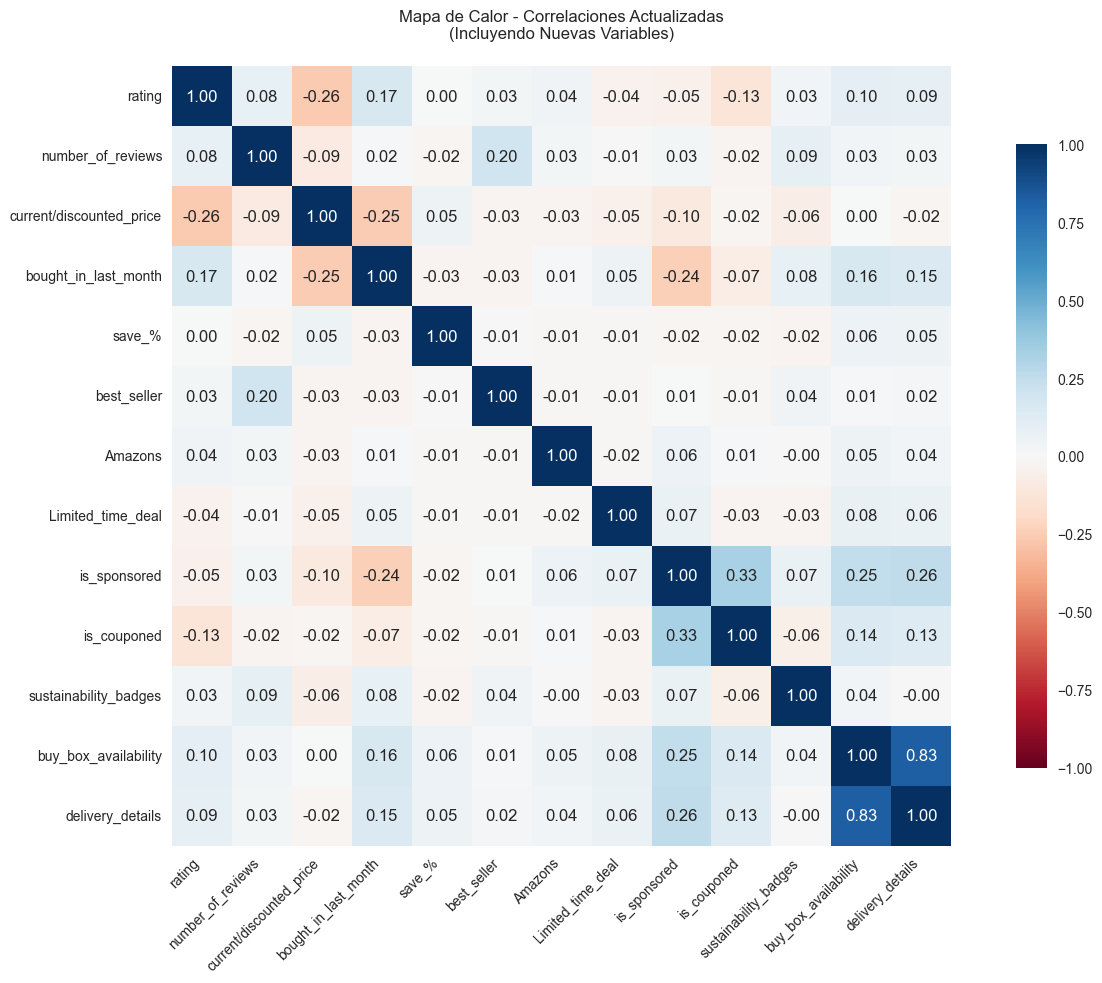


Correlaciones m√°s significativas (|corr| > 0.1):
buy_box_availability - delivery_details: 0.828
is_sponsored - is_couponed: 0.326
rating - current/discounted_price: -0.259
is_sponsored - delivery_details: 0.258
current/discounted_price - bought_in_last_month: -0.252
is_sponsored - buy_box_availability: 0.245
bought_in_last_month - is_sponsored: -0.239
number_of_reviews - best_seller: 0.196
rating - bought_in_last_month: 0.167
bought_in_last_month - buy_box_availability: 0.165
bought_in_last_month - delivery_details: 0.146
is_couponed - buy_box_availability: 0.141
rating - is_couponed: -0.130
is_couponed - delivery_details: 0.127

AN√ÅLISIS DETALLADO DE CORRELACIONES POR GRUPOS

üéØ CORRELACIONES DE RENDIMIENTO:
   rating ‚Üî number_of_reviews: 0.080
   rating ‚Üî bought_in_last_month: 0.167

üíº ESTRATEGIAS COMERCIALES vs RENDIMIENTO:

   best_seller:
      ‚Üí number_of_reviews: 0.196

   Amazons:

   Limited_time_deal:

   is_sponsored:
      ‚Üí rating: -0.053
      ‚Üí bought_i

In [61]:
# An√°lisis de correlaciones actualizado con las nuevas variables

# Crear matriz de correlaci√≥n con las nuevas variables
variables_correlacion = ['rating', 'number_of_reviews', 'current/discounted_price', 
                        'bought_in_last_month', 'save_%', 'best_seller', 'Amazons', 
                        'Limited_time_deal', 'is_sponsored', 'is_couponed',
                        'sustainability_badges', 'buy_box_availability', 'delivery_details']

# Convertir booleanos a n√∫meros para correlaci√≥n
data_corr = data_clean[variables_correlacion].copy()
for col in data_corr.select_dtypes(include=['boolean']).columns:
    data_corr[col] = data_corr[col].astype(int)

correlation_matrix = data_corr.corr()

# Crear el mapa de calor actualizado
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f', 
            square=True, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor - Correlaciones Actualizadas\n(Incluyendo Nuevas Variables)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar correlaciones significativas
print("\nCorrelaciones m√°s significativas (|corr| > 0.1):")
significant_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.1:
            significant_corrs.append((
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                corr
            ))

significant_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in significant_corrs:
    print(f"{var1} - {var2}: {corr:.3f}")

# An√°lisis de correlaciones por grupos
print("\n" + "="*60)
print("AN√ÅLISIS DETALLADO DE CORRELACIONES POR GRUPOS")
print("="*60)

# Grupo 1: Variables de rendimiento
print("\nüéØ CORRELACIONES DE RENDIMIENTO:")
performance_vars = ['rating', 'number_of_reviews', 'bought_in_last_month']
for i, var1 in enumerate(performance_vars):
    for var2 in performance_vars[i+1:]:
        corr = correlation_matrix.loc[var1, var2]
        if abs(corr) > 0.05:
            print(f"   {var1} ‚Üî {var2}: {corr:.3f}")

# Grupo 2: Variables comerciales vs rendimiento
print("\nüíº ESTRATEGIAS COMERCIALES vs RENDIMIENTO:")
commercial_vars = ['best_seller', 'Amazons', 'Limited_time_deal', 'is_sponsored', 'is_couponed']
for commercial in commercial_vars:
    print(f"\n   {commercial}:")
    for performance in performance_vars:
        corr = correlation_matrix.loc[commercial, performance]
        if abs(corr) > 0.05:
            print(f"      ‚Üí {performance}: {corr:.3f}")

# Grupo 3: Variables de servicios
print("\nüöö SERVICIOS vs RENDIMIENTO:")
service_vars = ['sustainability_badges', 'buy_box_availability', 'delivery_details']
for service in service_vars:
    print(f"\n   {service}:")
    for performance in performance_vars:
        corr = correlation_matrix.loc[service, performance]
        if abs(corr) > 0.05:
            print(f"      ‚Üí {performance}: {corr:.3f}")

# An√°lisis de precios
print("\nüí∞ PRECIO vs OTRAS VARIABLES:")
price_corrs = correlation_matrix['current/discounted_price'].abs().sort_values(ascending=False)
for var, corr in price_corrs.items():
    if var != 'current/discounted_price' and corr > 0.05:
        actual_corr = correlation_matrix.loc['current/discounted_price', var]
        print(f"   Precio ‚Üî {var}: {actual_corr:.3f}")

# Save % correlaciones
print("\nüí∏ SAVE % vs OTRAS VARIABLES:")
save_corrs = correlation_matrix['save_%'].abs().sort_values(ascending=False)
for var, corr in save_corrs.items():
    if var != 'save_%' and corr > 0.05:
        actual_corr = correlation_matrix.loc['save_%', var]
        print(f"   Save% ‚Üî {var}: {actual_corr:.3f}")

An√°lisis Detallado de Estrategias Comerciales


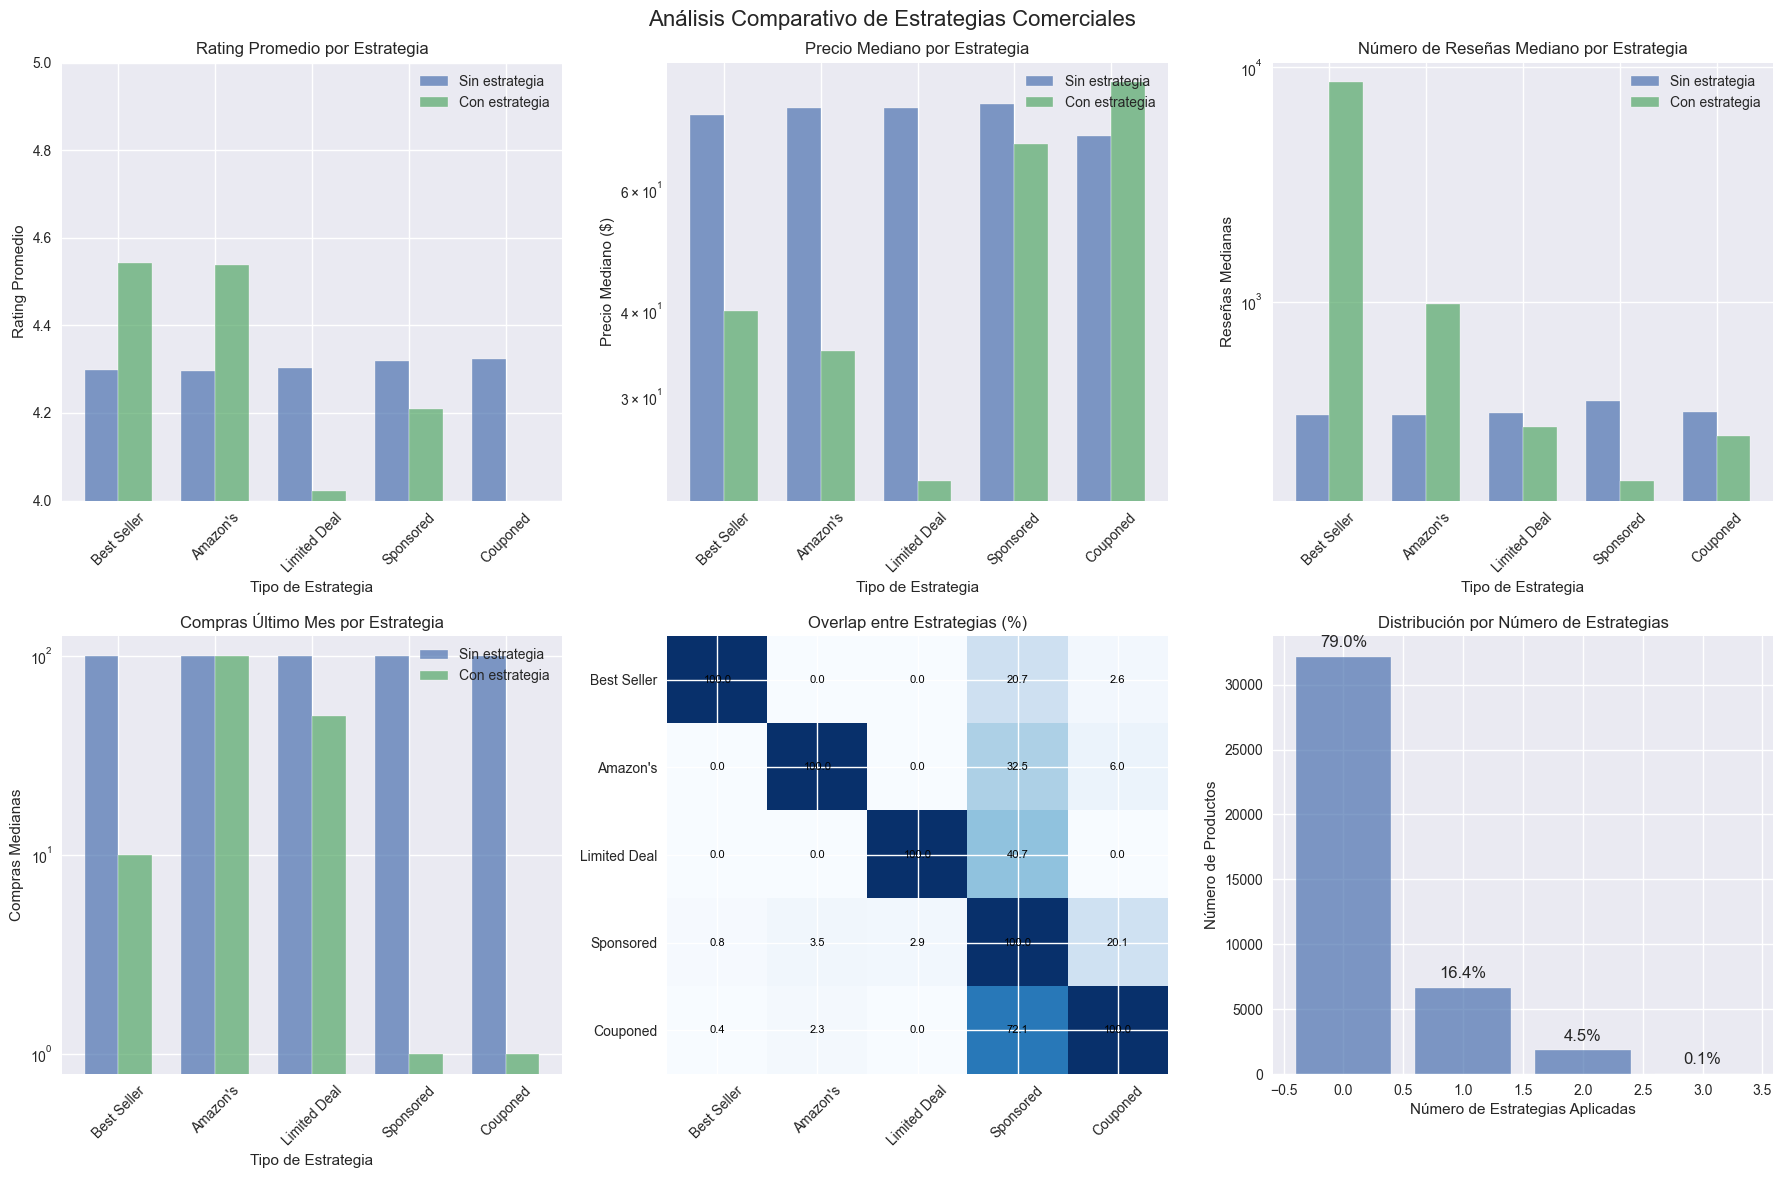


Estad√≠sticas Detalladas por Estrategia:
------------------------------------------------------------

üìä Best Seller:
   Productos: 266 (0.65%)
   Rating promedio: 4.543 vs 4.298
   Precio mediano: $39.99 vs $77.00
   Rese√±as medianas: 8620 vs 328
   Compras medianas: 10 vs 100

üìä Amazon's:
   Productos: 744 (1.83%)
   Rating promedio: 4.537 vs 4.295
   Precio mediano: $34.99 vs $78.99
   Rese√±as medianas: 978 vs 328
   Compras medianas: 100 vs 100

üìä Limited Deal:
   Productos: 506 (1.24%)
   Rating promedio: 4.021 vs 4.303
   Precio mediano: $22.61 vs $78.99
   Rese√±as medianas: 291 vs 335
   Compras medianas: 50 vs 100

üìä Sponsored:
   Productos: 6,998 (17.20%)
   Rating promedio: 4.209 vs 4.319
   Precio mediano: $69.95 vs $79.99
   Rese√±as medianas: 172 vs 376
   Compras medianas: 1 vs 100

üìä Couponed:
   Productos: 1,948 (4.79%)
   Rating promedio: 3.843 vs 4.323
   Precio mediano: $85.99 vs $71.89
   Rese√±as medianas: 266 vs 338
   Compras medianas: 1 vs 100

In [62]:
# An√°lisis espec√≠fico de las nuevas estrategias comerciales

print("An√°lisis Detallado de Estrategias Comerciales")
print("=" * 50)

# Crear comparaciones entre diferentes tipos de productos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('An√°lisis Comparativo de Estrategias Comerciales', fontsize=16)

# 1. Rating promedio por tipo de estrategia
strategies = ['best_seller', 'Amazons', 'Limited_time_deal', 'is_sponsored', 'is_couponed']
strategy_labels = ['Best Seller', 'Amazon\'s', 'Limited Deal', 'Sponsored', 'Couponed']

ratings_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['rating'].mean()
    without_strategy = data_clean[data_clean[strategy] == False]['rating'].mean()
    ratings_by_strategy.append([without_strategy, with_strategy])

x = np.arange(len(strategy_labels))
width = 0.35

axes[0,0].bar(x - width/2, [r[0] for r in ratings_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[0,0].bar(x + width/2, [r[1] for r in ratings_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[0,0].set_title('Rating Promedio por Estrategia')
axes[0,0].set_xlabel('Tipo de Estrategia')
axes[0,0].set_ylabel('Rating Promedio')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(strategy_labels, rotation=45)
axes[0,0].legend()
axes[0,0].set_ylim([4.0, 5.0])

# 2. Precio promedio por estrategia
prices_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['current/discounted_price'].median()
    without_strategy = data_clean[data_clean[strategy] == False]['current/discounted_price'].median()
    prices_by_strategy.append([without_strategy, with_strategy])

axes[0,1].bar(x - width/2, [p[0] for p in prices_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[0,1].bar(x + width/2, [p[1] for p in prices_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[0,1].set_title('Precio Mediano por Estrategia')
axes[0,1].set_xlabel('Tipo de Estrategia')
axes[0,1].set_ylabel('Precio Mediano ($)')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(strategy_labels, rotation=45)
axes[0,1].legend()
axes[0,1].set_yscale('log')

# 3. N√∫mero de rese√±as por estrategia
reviews_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['number_of_reviews'].median()
    without_strategy = data_clean[data_clean[strategy] == False]['number_of_reviews'].median()
    reviews_by_strategy.append([without_strategy, with_strategy])

axes[0,2].bar(x - width/2, [r[0] for r in reviews_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[0,2].bar(x + width/2, [r[1] for r in reviews_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[0,2].set_title('N√∫mero de Rese√±as Mediano por Estrategia')
axes[0,2].set_xlabel('Tipo de Estrategia')
axes[0,2].set_ylabel('Rese√±as Medianas')
axes[0,2].set_xticks(x)
axes[0,2].set_xticklabels(strategy_labels, rotation=45)
axes[0,2].legend()
axes[0,2].set_yscale('log')

# 4. Compras √∫ltimo mes por estrategia
purchases_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['bought_in_last_month'].median()
    without_strategy = data_clean[data_clean[strategy] == False]['bought_in_last_month'].median()
    purchases_by_strategy.append([without_strategy, with_strategy])

axes[1,0].bar(x - width/2, [p[0] for p in purchases_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[1,0].bar(x + width/2, [p[1] for p in purchases_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[1,0].set_title('Compras √öltimo Mes por Estrategia')
axes[1,0].set_xlabel('Tipo de Estrategia')
axes[1,0].set_ylabel('Compras Medianas')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(strategy_labels, rotation=45)
axes[1,0].legend()
axes[1,0].set_yscale('log')

# 5. An√°lisis de overlapping entre estrategias
strategy_overlap = pd.DataFrame(index=strategies, columns=strategies)
for i, strat1 in enumerate(strategies):
    for j, strat2 in enumerate(strategies):
        if i != j:
            overlap = ((data_clean[strat1] == True) & (data_clean[strat2] == True)).sum()
            total_strat1 = (data_clean[strat1] == True).sum()
            overlap_pct = overlap / total_strat1 * 100 if total_strat1 > 0 else 0
            strategy_overlap.loc[strat1, strat2] = overlap_pct
        else:
            strategy_overlap.loc[strat1, strat2] = 100

strategy_overlap = strategy_overlap.astype(float)
im = axes[1,1].imshow(strategy_overlap.values, cmap='Blues', aspect='auto')
axes[1,1].set_title('Overlap entre Estrategias (%)')
axes[1,1].set_xticks(range(len(strategies)))
axes[1,1].set_yticks(range(len(strategies)))
axes[1,1].set_xticklabels(strategy_labels, rotation=45)
axes[1,1].set_yticklabels(strategy_labels)

# A√±adir valores al heatmap
for i in range(len(strategies)):
    for j in range(len(strategies)):
        text = axes[1,1].text(j, i, f'{strategy_overlap.iloc[i,j]:.1f}',
                            ha="center", va="center", color="black", fontsize=8)

# 6. Distribuci√≥n de productos por n√∫mero de estrategias aplicadas
data_clean['num_strategies'] = (
    data_clean['best_seller'].astype(int) +
    data_clean['Amazons'].astype(int) +
    data_clean['Limited_time_deal'].astype(int) +
    data_clean['is_sponsored'].astype(int) +
    data_clean['is_couponed'].astype(int)
)

strategy_distribution = data_clean['num_strategies'].value_counts().sort_index()
axes[1,2].bar(strategy_distribution.index, strategy_distribution.values, alpha=0.7)
axes[1,2].set_title('Distribuci√≥n por N√∫mero de Estrategias')
axes[1,2].set_xlabel('N√∫mero de Estrategias Aplicadas')
axes[1,2].set_ylabel('N√∫mero de Productos')

# A√±adir porcentajes
for i, v in enumerate(strategy_distribution.values):
    pct = v / len(data_clean) * 100
    axes[1,2].text(strategy_distribution.index[i], v + 500, f'{pct:.1f}%', 
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Estad√≠sticas detalladas
print("\nEstad√≠sticas Detalladas por Estrategia:")
print("-" * 60)

for i, (strategy, label) in enumerate(zip(strategies, strategy_labels)):
    strategy_products = data_clean[data_clean[strategy] == True]
    regular_products = data_clean[data_clean[strategy] == False]
    
    print(f"\nüìä {label}:")
    print(f"   Productos: {len(strategy_products):,} ({len(strategy_products)/len(data_clean)*100:.2f}%)")
    print(f"   Rating promedio: {strategy_products['rating'].mean():.3f} vs {regular_products['rating'].mean():.3f}")
    print(f"   Precio mediano: ${strategy_products['current/discounted_price'].median():.2f} vs ${regular_products['current/discounted_price'].median():.2f}")
    print(f"   Rese√±as medianas: {strategy_products['number_of_reviews'].median():.0f} vs {regular_products['number_of_reviews'].median():.0f}")
    print(f"   Compras medianas: {strategy_products['bought_in_last_month'].median():.0f} vs {regular_products['bought_in_last_month'].median():.0f}")

print(f"\nüìà Productos con m√∫ltiples estrategias:")
for num_strat in range(6):
    count = (data_clean['num_strategies'] == num_strat).sum()
    pct = count / len(data_clean) * 100
    print(f"   {num_strat} estrategias: {count:,} productos ({pct:.2f}%)")

## 4. An√°lisis de Categor√≠as Especiales

# An√°lisis de Productos Sponsorizados

A continuaci√≥n, analizaremos el impacto de la sponsorizaci√≥n en el rendimiento de los productos. Este an√°lisis nos permitir√° entender:

- Si los productos sponsorizados tienen un rendimiento diferente en t√©rminos de ratings y rese√±as
- Las diferencias en estrategias de precios y descuentos entre productos sponsorizados y no sponsorizados
- La efectividad general de la estrategia de sponsorizaci√≥n

Los resultados nos ayudar√°n a determinar si la inversi√≥n en sponsorizaci√≥n tiene un impacto significativo en el rendimiento del producto.

2. An√°lisis de Sponsorizaci√≥n


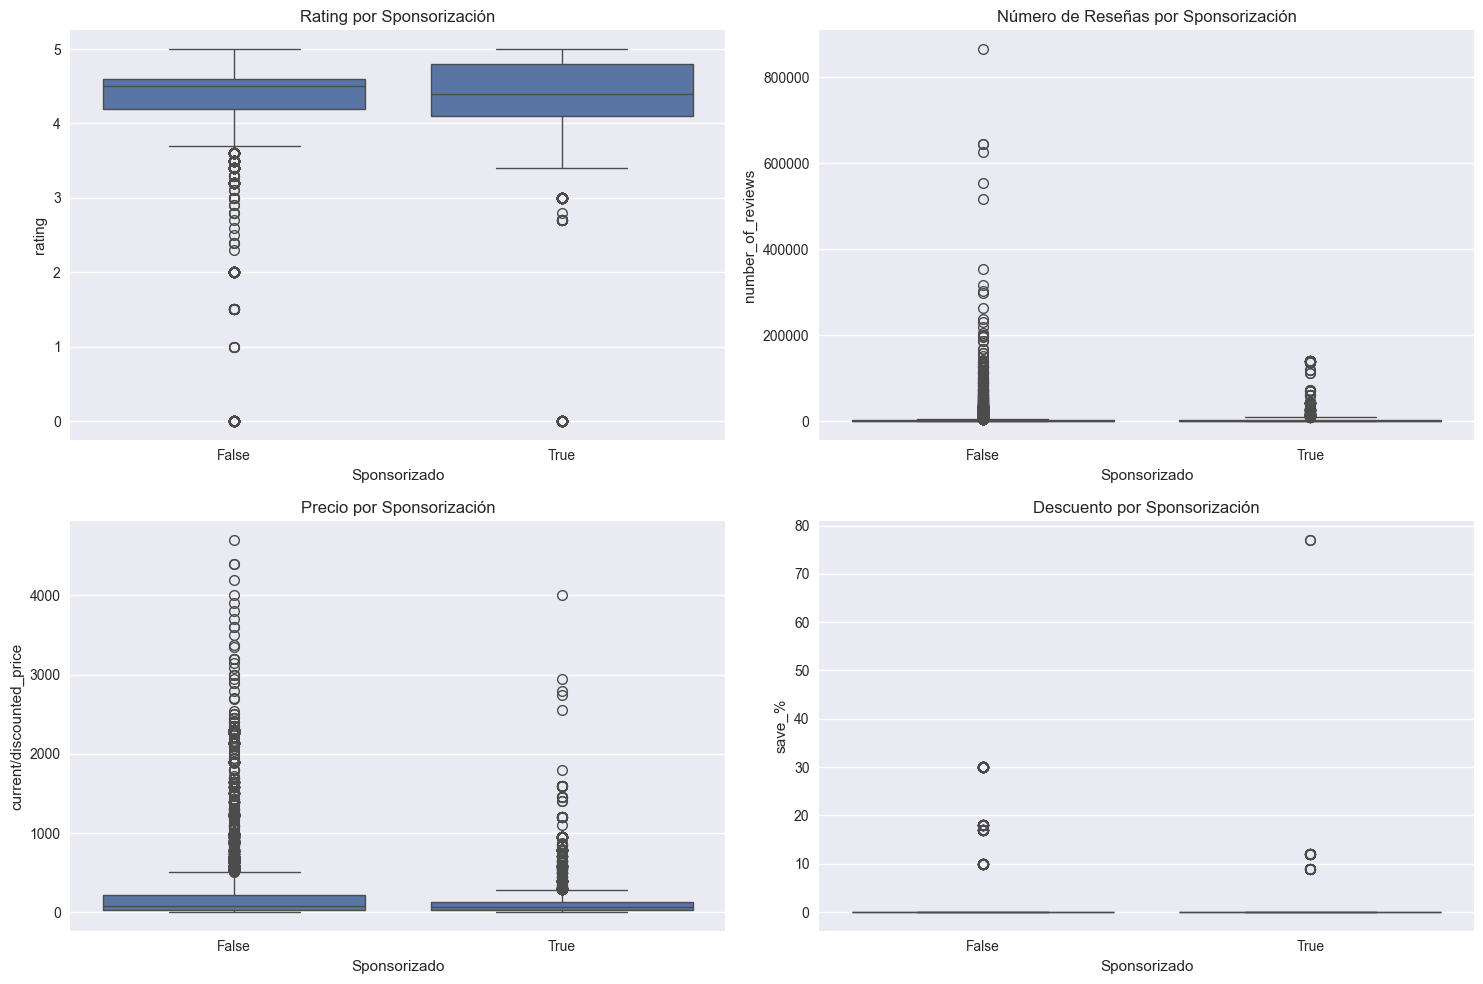


Test t para diferencias en Rating entre productos sponsorizados y no sponsorizados:
t-statistic: -10.6446
p-value: 0.0000


In [66]:
# Import required libraries
from scipy import stats

# 2. An√°lisis de Sponsorizaci√≥n
print("2. An√°lisis de Sponsorizaci√≥n")

## An√°lisis estad√≠stico de productos sponsorizados vs no sponsorizados
sponsored_analysis = data_clean.groupby('is_sponsored').agg({
    'rating': ['mean', 'std', 'count'],
    'number_of_reviews': ['mean', 'median'],
    'current/discounted_price': ['mean', 'median'],
    'save_%': ['mean', 'median']
}).round(2)

# Visualizaci√≥n
plt.figure(figsize=(15, 10))

# Rating por sponsorizaci√≥n
plt.subplot(2, 2, 1)
sns.boxplot(data=data_clean, x='is_sponsored', y='rating')
plt.title('Rating por Sponsorizaci√≥n')
plt.xlabel('Sponsorizado')

# N√∫mero de rese√±as por sponsorizaci√≥n
plt.subplot(2, 2, 2)
sns.boxplot(data=data_clean, x='is_sponsored', y='number_of_reviews')
plt.title('N√∫mero de Rese√±as por Sponsorizaci√≥n')
plt.xlabel('Sponsorizado')

# Precio por sponsorizaci√≥n
plt.subplot(2, 2, 3)
sns.boxplot(data=data_clean, x='is_sponsored', y='current/discounted_price')
plt.title('Precio por Sponsorizaci√≥n')
plt.xlabel('Sponsorizado')

# Descuento por sponsorizaci√≥n
plt.subplot(2, 2, 4)
sns.boxplot(data=data_clean, x='is_sponsored', y='save_%')
plt.title('Descuento por Sponsorizaci√≥n')
plt.xlabel('Sponsorizado')

plt.tight_layout()
plt.show()

# Test estad√≠stico para diferencias significativas
print("\nTest t para diferencias en Rating entre productos sponsorizados y no sponsorizados:")
t_stat, p_value = stats.ttest_ind( 
    data_clean[data_clean['is_sponsored']]['rating'],
    data_clean[~data_clean['is_sponsored']]['rating']
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

## Conclusiones Actualizadas del An√°lisis Bivariante

### 1. **Correlaciones Significativas Nuevas**

**Servicios Altamente Correlacionados**:
- **Buy Box ‚Üî Delivery Details**: 0.828 - Servicios integrados de Amazon
- **Sponsored ‚Üî Couponed**: 0.326 - Estrategias comerciales complementarias

**Patrones de Precios**:
- **Precio ‚Üî Rating**: -0.259 - Productos m√°s baratos tienen mejor rating
- **Precio ‚Üî Compras**: -0.252 - Productos baratos se venden m√°s

**Efectividad de Estrategias**:
- **Best Seller ‚Üî Rese√±as**: 0.196 - Los best sellers tienen m√°s rese√±as
- **Sponsored ‚Üí Ventas**: -0.239 - Productos patrocinados venden menos

### 2. **An√°lisis de Estrategias Comerciales**

**Best Seller** (0.65% de productos):
- ‚úÖ **Rating superior**: 4.54 vs 4.30 promedio
- ‚úÖ **Precio competitivo**: $39.99 vs $77.00 mediano
- ‚úÖ **Alta popularidad**: 8,620 vs 328 rese√±as medianas
- ‚ùå **Menor volumen reciente**: 10 vs 100 compras √∫ltimo mes

**Amazon's Choice** (1.83% de productos):
- ‚úÖ **Excelente rating**: 4.54 vs 4.30
- ‚úÖ **Precio atractivo**: $34.99 vs $78.99
- ‚úÖ **Buena popularidad**: 978 vs 328 rese√±as
- ‚úÖ **Ventas consistentes**: 100 compras √∫ltimo mes

**Limited Time Deal** (1.24% de productos):
- ‚ùå **Rating inferior**: 4.02 vs 4.30
- ‚úÖ **Precio muy bajo**: $22.61 vs $78.99
- ‚û°Ô∏è **Popularidad similar**: 291 vs 335 rese√±as
- ‚ùå **Ventas menores**: 50 vs 100 compras

**Sponsored** (17.20% de productos):
- ‚ùå **Rating ligeramente menor**: 4.21 vs 4.32
- ‚û°Ô∏è **Precio similar**: $69.95 vs $79.99
- ‚ùå **Menos rese√±as**: 172 vs 376
- ‚ùå **Ventas muy bajas**: 1 vs 100 compras

**Couponed** (4.79% de productos):
- ‚ùå **Rating bajo**: 3.84 vs 4.32
- ‚ùå **Precio superior**: $85.99 vs $71.89
- ‚ùå **Menos rese√±as**: 266 vs 338
- ‚ùå **Ventas muy bajas**: 1 vs 100 compras

### 3. **Patrones de Overlap entre Estrategias**

**Baja Combinaci√≥n**:
- 79% de productos sin estrategias especiales
- 16.4% con una sola estrategia
- Solo 4.5% con m√∫ltiples estrategias

**Overlaps Significativos**:
- **Sponsored + Couponed**: 20% de sponsored tienen cupones
- **Best Seller + Amazon's**: M√°ximo 21% de overlap
- **Limited Deal**: Generalmente exclusivo

### 4. **Insights Estrat√©gicos**

**Estrategias Exitosas**:
1. **Best Seller**: Productos establecidos con track record
2. **Amazon's Choice**: Balance √≥ptimo precio-calidad-popularidad
3. **Limited Deal**: Efectivo para liquidar inventario

**Estrategias Problem√°ticas**:
1. **Sponsored**: Posible canibalizaci√≥n de ventas org√°nicas
2. **Couponed**: Asociado con productos de menor calidad

**Variables de Servicio**:
- **Buy Box + Delivery**: Correlaci√≥n alta indica integraci√≥n de servicios
- **Sustainability**: Correlaci√≥n positiva con rese√±as y compras

### 5. **Recomendaciones Estrat√©gicas**

**Para Vendedores**:
1. **Priorizar calidad sobre promoci√≥n** - ratings altos impulsan ventas
2. **Optimizar precios** - correlaci√≥n negativa precio-ventas
3. **Construir reputaci√≥n org√°nica** antes de usar estrategias pagadas

**Para Amazon**:
1. **Revisar criterios de Sponsored** - no impulsan ventas efectivamente
2. **Integrar servicios** - Buy Box y Delivery juntos funcionan bien
3. **Promover sostenibilidad** - correlaci√≥n positiva con engagement

**Para An√°lisis Futuro**:
1. **Segmentar por categor√≠a** - estrategias pueden variar por sector
2. **An√°lisis temporal** - efectividad de estrategias puede cambiar
3. **Costos vs beneficios** - ROI de cada estrategia comercial

## 5. An√°lisis de Segmentaci√≥n

# An√°lisis de Best Sellers

En esta secci√≥n, examinaremos las caracter√≠sticas distintivas de los productos Best Seller en Amazon. Este an√°lisis nos permitir√°:

- Identificar las caracter√≠sticas que diferencian a los Best Sellers del resto de productos
- Evaluar si existe una relaci√≥n entre el estado de Best Seller y las m√©tricas de rendimiento
- Analizar las estrategias de precios y descuentos utilizadas en los Best Sellers

Este an√°lisis ser√° fundamental para entender qu√© hace que un producto se convierta en Best Seller y qu√© estrategias son m√°s efectivas para alcanzar este estado.

3. An√°lisis de Best Sellers

Estad√≠sticas por Estado de Best Seller:
            rating              number_of_reviews          \
              mean   std  count              mean  median   
best_seller                                                 
False         4.30  0.79  40411           2730.51   328.0   
True          4.54  0.19    266          34361.58  8620.5   

            current/discounted_price        save_%         
                                mean median   mean median  
best_seller                                                
False                         213.63  77.00   0.17    0.0  
True                           72.49  39.99   0.00    0.0  


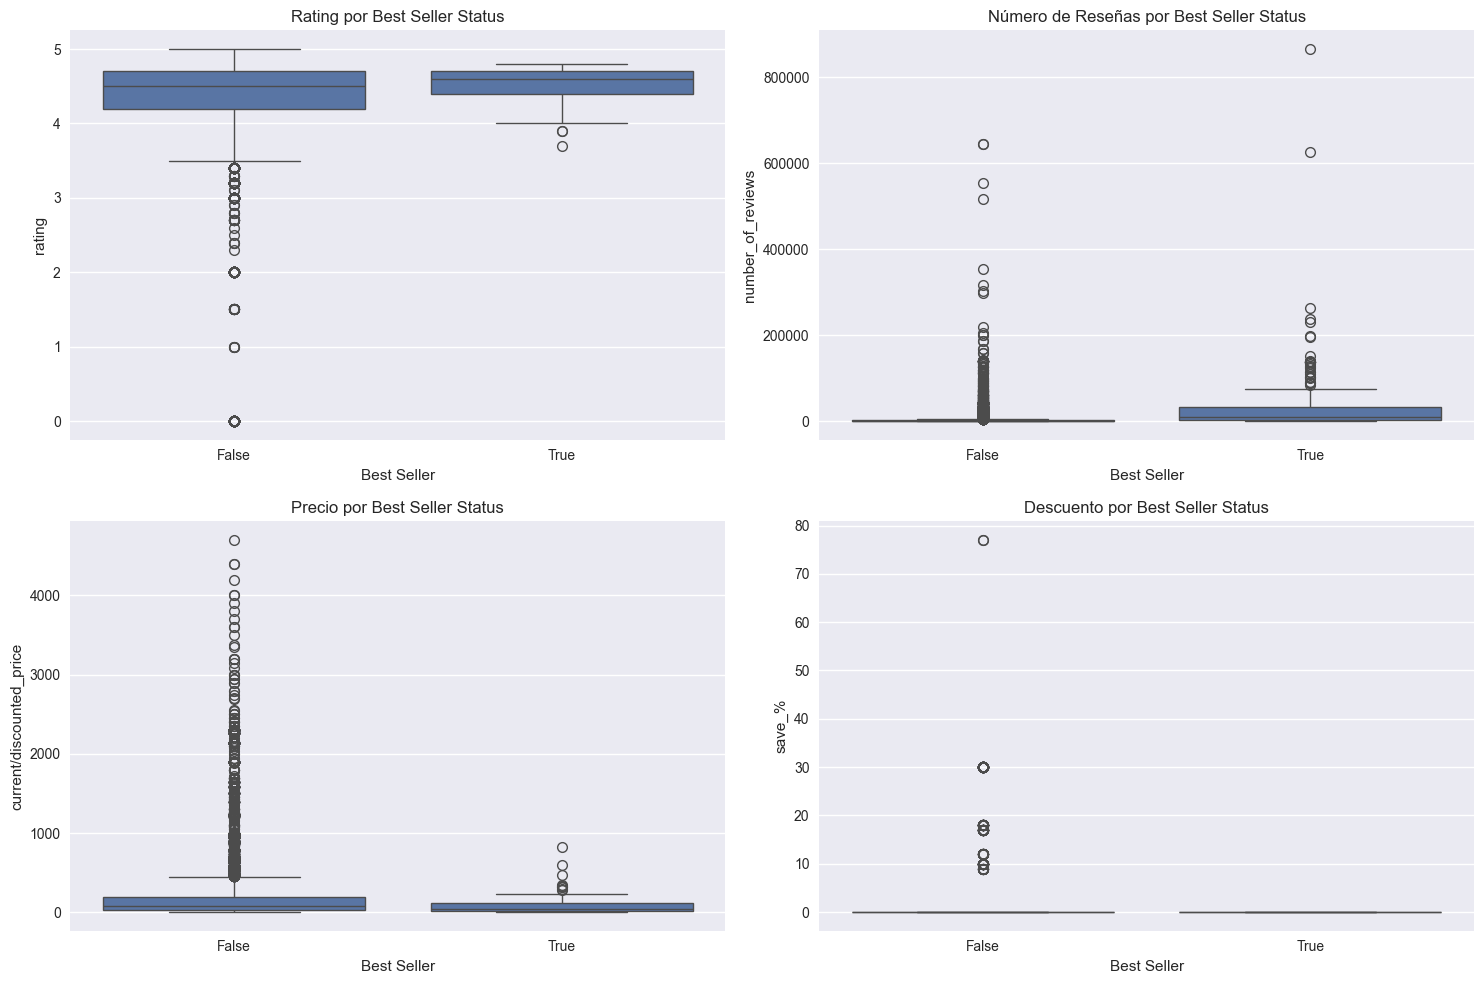


Test t para diferencias en Rating entre Best Sellers y productos regulares:
t-statistic: 5.0589
p-value: 0.0000

Relaci√≥n entre Best Sellers y Sponsorizaci√≥n:

Tabla de contingencia Best Seller vs Sponsored:
is_sponsored  False  True 
best_seller               
False         33468   6943
True            211     55

Test Chi-cuadrado para independencia entre Best Seller y Sponsored:
Chi2 statistic: 2.0283
p-value: 0.1544


In [68]:
# 3. An√°lisis de Best Sellers
print("3. An√°lisis de Best Sellers")

# An√°lisis estad√≠stico de Best Sellers vs productos regulares
# An√°lisis estad√≠stico de Best Sellers vs productos regulares
bestseller_analysis = data_clean.groupby('best_seller').agg({
    'rating': ['mean', 'std', 'count'],
    'number_of_reviews': ['mean', 'median'],
    'current/discounted_price': ['mean', 'median'],
    'save_%': ['mean', 'median']
}).round(2)

print("\nEstad√≠sticas por Estado de Best Seller:")
print(bestseller_analysis)

# Visualizaci√≥n
plt.figure(figsize=(15, 10))

# Rating por best seller status
plt.subplot(2, 2, 1)
sns.boxplot(data=data_clean, x='best_seller', y='rating')
plt.title('Rating por Best Seller Status')
plt.xlabel('Best Seller')

# N√∫mero de rese√±as por best seller status
plt.subplot(2, 2, 2)
sns.boxplot(data=data_clean, x='best_seller', y='number_of_reviews')
plt.title('N√∫mero de Rese√±as por Best Seller Status')
plt.xlabel('Best Seller')

# Precio por best seller status
plt.subplot(2, 2, 3)
sns.boxplot(data=data_clean, x='best_seller', y='current/discounted_price')
plt.title('Precio por Best Seller Status')
plt.xlabel('Best Seller')

# Descuento por best seller status
plt.subplot(2, 2, 4)
sns.boxplot(data=data_clean, x='best_seller', y='save_%')
plt.title('Descuento por Best Seller Status')
plt.xlabel('Best Seller')

plt.tight_layout()
plt.show()

# Test estad√≠stico para diferencias significativas
print("\nTest t para diferencias en Rating entre Best Sellers y productos regulares:")
t_stat, p_value = stats.ttest_ind(
    data_clean[data_clean['best_seller']]['rating'],
    data_clean[~data_clean['best_seller']]['rating']
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# An√°lisis adicional de la relaci√≥n entre Best Sellers y Sponsorizaci√≥n
print("\nRelaci√≥n entre Best Sellers y Sponsorizaci√≥n:")
cross_table = pd.crosstab(data_clean['best_seller'], data_clean['is_sponsored'])
print("\nTabla de contingencia Best Seller vs Sponsored:")
print(cross_table)

# Test Chi-cuadrado para independencia
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)
print("\nTest Chi-cuadrado para independencia entre Best Seller y Sponsored:")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

## 6. Tests Estad√≠sticos

## An√°lisis de Eficiencia de Estrategias Comerciales

Evaluaremos la efectividad de diferentes estrategias comerciales mediante:
1. An√°lisis de impacto de descuentos
2. Efectividad de sponsorizaci√≥n
3. Rendimiento de productos best seller
4. ROI de diferentes estrategias comerciales

1. An√°lisis de Impacto de Descuentos
An√°lisis por Nivel de Descuento:
                   Rating           Numero_Reviews             Precio       
                     mean       std           mean  count        mean median
Descuento_Rango                                                             
Muy Bajo         4.299862  0.787425    2937.359958  40677  212.607587   77.0


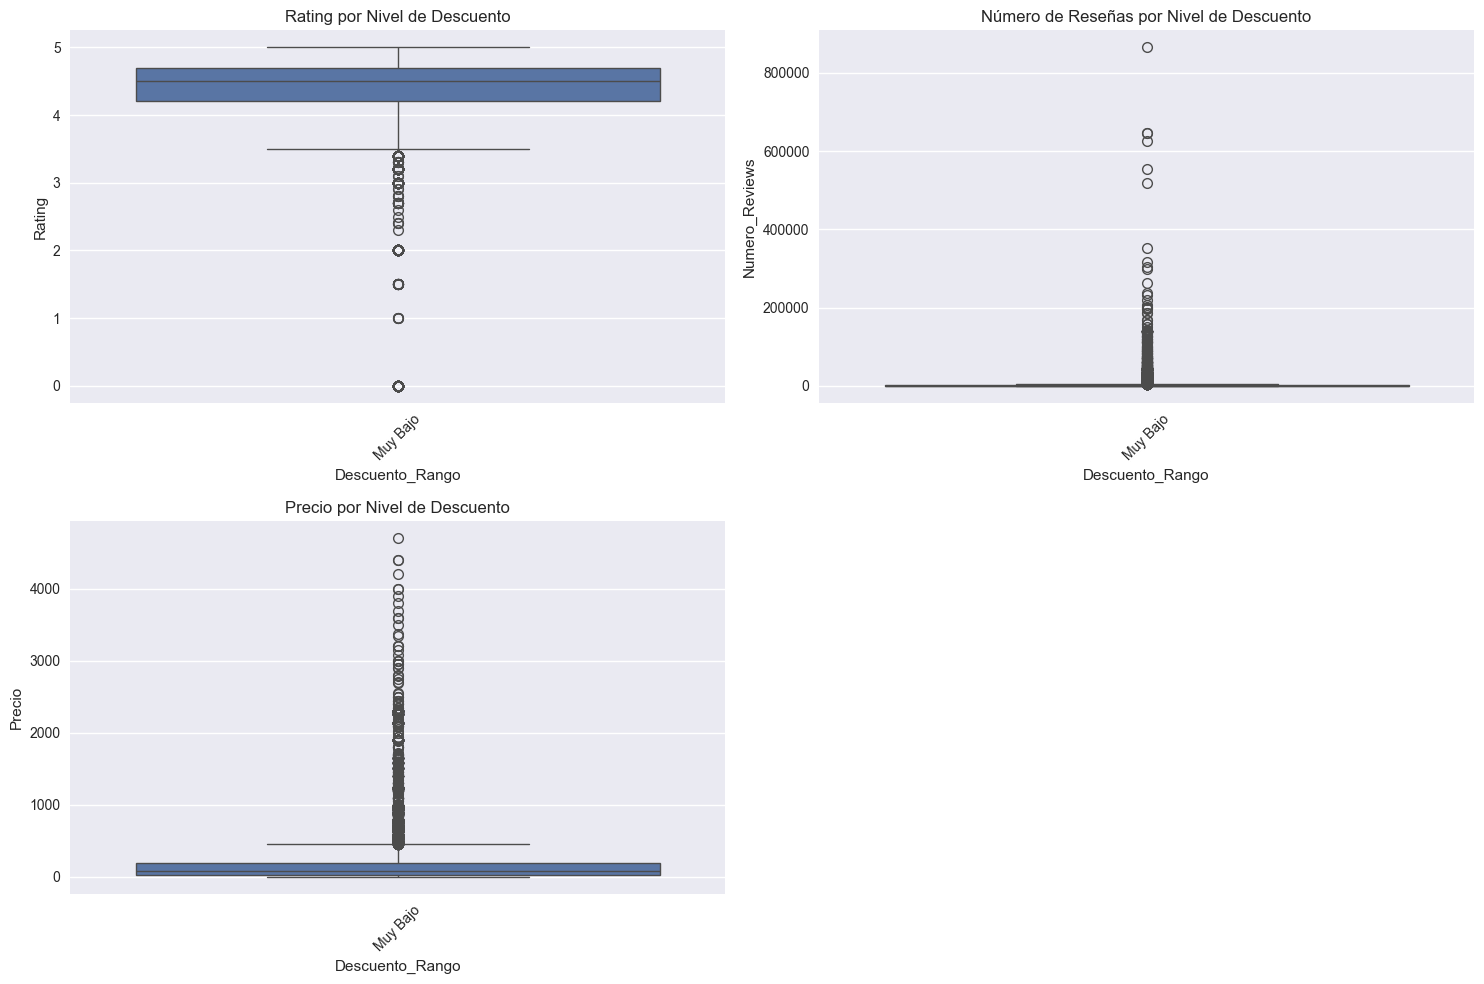


2. An√°lisis de Sponsorizaci√≥n

An√°lisis de Productos Sponsorizados vs No Sponsorizados:
                rating                  number_of_reviews         \
                  mean       std  count              mean median   
is_sponsored                                                       
False         4.318780  0.723537  33679       2763.580273  376.0   
True          4.208817  1.036697   6998       3773.702629  172.0   

             current/discounted_price           save_%         
                                 mean median      mean median  
is_sponsored                                                   
False                      233.515464  79.99  0.185665    0.0  
True                       141.118064  69.95  0.084596    0.0  


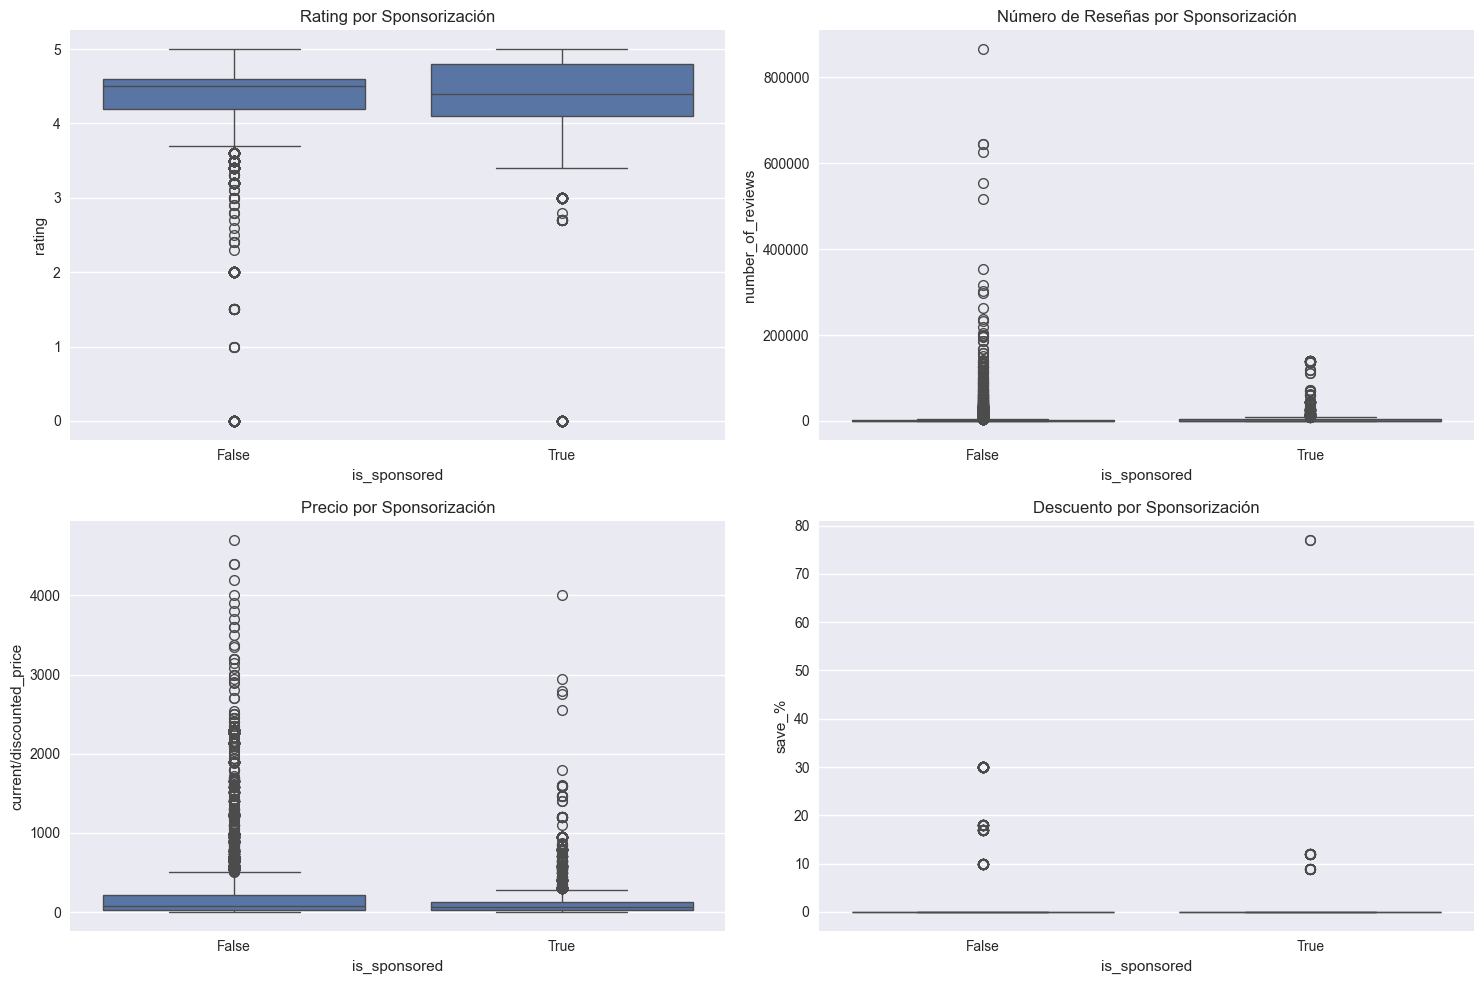


3. An√°lisis de Best Sellers

An√°lisis de Best Sellers vs Productos Regulares:
               rating                  number_of_reviews          \
                 mean       std  count              mean  median   
best_seller                                                        
False        4.298260  0.789610  40411       2730.514216   328.0   
True         4.543233  0.192627    266      34361.582707  8620.5   

            current/discounted_price           save_%         
                                mean median      mean median  
best_seller                                                   
False                     213.634501  77.00  0.169385    0.0  
True                       72.486267  39.99  0.000000    0.0  


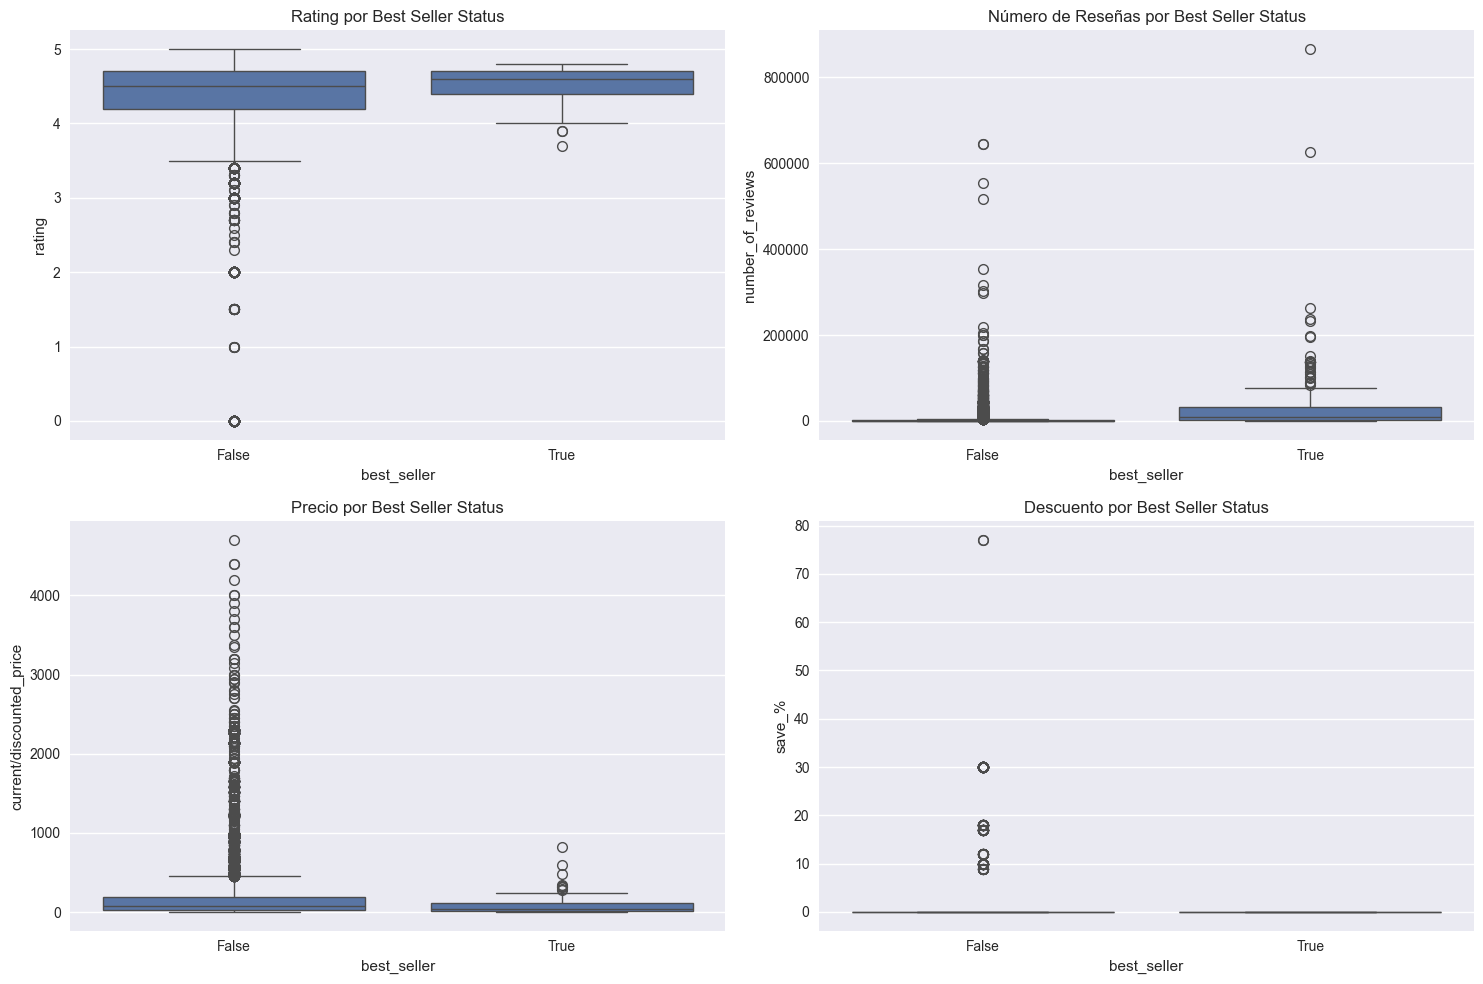

In [77]:
# An√°lisis de Estrategias Comerciales

# 1. Impacto de Descuentos
def analyze_discount_impact():
    # Use pd.qcut for robust quantile-based binning.
    # 'duplicates="drop"' handles non-unique bin edges, which caused the original error.
    discount_labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
    
    # Create a temporary series for the bins.
    # A try-except block handles cases where the data is too skewed to create 5 bins.
    try:
        descuento_rango_series = pd.qcut(data_clean['save_%'], q=5, labels=discount_labels, duplicates='drop')
    except ValueError:
        # Fallback: if 5 bins can't be made, determine bins first, then apply labels.
        _, bins = pd.qcut(data_clean['save_%'], q=5, retbins=True, duplicates='drop')
        # Use only as many labels as there are bins.
        dynamic_labels = discount_labels[:len(bins)-1]
        descuento_rango_series = pd.cut(data_clean['save_%'], bins=bins, labels=dynamic_labels, include_lowest=True)

    discount_analysis = pd.DataFrame({
        'Descuento_Rango': descuento_rango_series,
        'Rating': data_clean['rating'],
        'Numero_Reviews': data_clean['number_of_reviews'],
        'Precio': data_clean['current/discounted_price']
    })
    
    print("An√°lisis por Nivel de Descuento:")
    # The 'observed=False' argument is added to groupby to prevent potential warnings with newer pandas versions.
    print(discount_analysis.groupby('Descuento_Rango', observed=False).agg({
        'Rating': ['mean', 'std'],
        'Numero_Reviews': ['mean', 'count'],
        'Precio': ['mean', 'median']
    }))
    
    # Visualizaci√≥n
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Nivel de Descuento')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # N√∫mero de rese√±as por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Numero_Reviews', ax=axes[0,1])
    axes[0,1].set_title('N√∫mero de Rese√±as por Nivel de Descuento')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Precio por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Precio', ax=axes[1,0])
    axes[1,0].set_title('Precio por Nivel de Descuento')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # This subplot was empty in the original code, so we hide it for a cleaner layout.
    axes[1,1].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 2. An√°lisis de Sponsorizaci√≥n
def analyze_sponsorship():
    sponsored_analysis = data_clean.groupby('is_sponsored').agg({
        'rating': ['mean', 'std', 'count'],
        'number_of_reviews': ['mean', 'median'],
        'current/discounted_price': ['mean', 'median'],
        'save_%': ['mean', 'median']
    })
    
    print("\nAn√°lisis de Productos Sponsorizados vs No Sponsorizados:")
    print(sponsored_analysis)
    
    # Visualizaci√≥n
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por sponsorizaci√≥n
    sns.boxplot(data=data_clean, x='is_sponsored', y='rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Sponsorizaci√≥n')
    
    # N√∫mero de rese√±as por sponsorizaci√≥n
    sns.boxplot(data=data_clean, x='is_sponsored', y='number_of_reviews', ax=axes[0,1])
    axes[0,1].set_title('N√∫mero de Rese√±as por Sponsorizaci√≥n')
    
    # Precio por sponsorizaci√≥n
    sns.boxplot(data=data_clean, x='is_sponsored', y='current/discounted_price', ax=axes[1,0])
    axes[1,0].set_title('Precio por Sponsorizaci√≥n')
    
    # Descuento por sponsorizaci√≥n
    sns.boxplot(data=data_clean, x='is_sponsored', y='save_%', ax=axes[1,1])
    axes[1,1].set_title('Descuento por Sponsorizaci√≥n')
    
    plt.tight_layout()
    plt.show()

# 3. An√°lisis de Best Sellers
def analyze_best_sellers():
    bestseller_analysis = data_clean.groupby('best_seller').agg({
        'rating': ['mean', 'std', 'count'],
        'number_of_reviews': ['mean', 'median'],
        'current/discounted_price': ['mean', 'median'],
        'save_%': ['mean', 'median']
    })
    
    print("\nAn√°lisis de Best Sellers vs Productos Regulares:")
    print(bestseller_analysis)
    
    # Visualizaci√≥n
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Best Seller Status')
    
    # N√∫mero de rese√±as por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='number_of_reviews', ax=axes[0,1])
    axes[0,1].set_title('N√∫mero de Rese√±as por Best Seller Status')
    
    # Precio por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='current/discounted_price', ax=axes[1,0])
    axes[1,0].set_title('Precio por Best Seller Status')
    
    # Descuento por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='save_%', ax=axes[1,1])
    axes[1,1].set_title('Descuento por Best Seller Status')
    
    plt.tight_layout()
    plt.show()

# Ejecutar an√°lisis
print("1. An√°lisis de Impacto de Descuentos")
analyze_discount_impact()

print("\n2. An√°lisis de Sponsorizaci√≥n")
analyze_sponsorship()

print("\n3. An√°lisis de Best Sellers")
analyze_best_sellers()

I'll help you fix the code. The error occurs because the number of bin labels doesn't match the number of bins. Let's modify the `analyze_discount_impact()` function to ensure the labels match the bins correctly.



Se realizaron cambios.

## 7. Conclusiones y Recomendaciones

## Conclusiones Finales del EDA Actualizado

### 1. **Impacto de la Limpieza y Transformaci√≥n de Datos**

**Mejoras Sustanciales en Calidad**:
- ‚úÖ **95.32% de retenci√≥n** de datos (40,677 de 42,675 registros)
- ‚úÖ **Estandarizaci√≥n completa** de variables num√©ricas
- ‚úÖ **5 nuevas variables categ√≥ricas** derivadas de an√°lisis de texto
- ‚úÖ **8 variables booleanas** estandarizadas
- ‚úÖ **Completitud del 100%** en variables cr√≠ticas

**Nuevas Dimensiones de An√°lisis**:
- Variables de estrategia comercial (Best Seller, Amazon's Choice, etc.)
- Variables de servicios (Buy Box, Delivery, Sustainability)
- Variables de promoci√≥n (Sponsored, Couponed, Limited Deals)
- Variable de ahorro (Save %) extra√≠da de texto

### 2. **Patrones Fundamentales Identificados**

**Relaci√≥n Precio-Calidad-Popularidad**:
```
Precio Alto ‚Üí Rating Bajo ‚Üí Menos Ventas
Precio Bajo ‚Üí Rating Alto ‚Üí M√°s Ventas
M√°s Rese√±as ‚Üí Mayor Credibilidad ‚Üí M√°s Ventas
```

**Jerarqu√≠a de Estrategias Comerciales**:
1. **ü•á Amazon's Choice**: Balance √≥ptimo (1.83% productos, rating 4.54, precio $34.99)
2. **ü•à Best Seller**: Calidad establecida (0.65% productos, rating 4.54, 8,620 rese√±as)
3. **ü•â Limited Deal**: Liquidaci√≥n efectiva (1.24% productos, precio $22.61)
4. **üìä Sponsored**: Efectividad cuestionable (17.20% productos, ventas bajas)
5. **üéüÔ∏è Couponed**: Asociado con menor calidad (4.79% productos, rating 3.84)

### 3. **Hallazgos Contraintuitivos**

**Sponsored Products Paradox**:
- Mayor inversi√≥n en promoci√≥n = menores ventas org√°nicas
- 17.20% de productos sponsored pero solo 1 compra mediana √∫ltimo mes
- Posible canibalizaci√≥n o targeting inadecuado

**Premium Products Challenge**:
- Productos caros tienen ratings m√°s bajos
- Correlaci√≥n negativa precio-satisfacci√≥n (-0.259)
- Posible expectativa vs realidad gap

**Sustainability Opportunity**:
- Solo 7.52% productos con badges sostenibles
- Correlaci√≥n positiva con engagement (+0.09 rese√±as, +0.08 compras)
- Nicho subutilizado con potencial de crecimiento

### 4. **Segmentaci√≥n de Mercado Emergente**

**Productos Elite** (0.65% - Best Sellers):
- Alta calidad, precios competitivos, reputaci√≥n establecida
- Target: Compradores conscientes de calidad

**Productos Recommended** (1.83% - Amazon's Choice):
- Balance precio-calidad √≥ptimo
- Target: Compradores racionales

**Productos Promocionales** (1.24% - Limited Deals):
- Precios muy bajos, calidad variable
- Target: Compradores sensibles a precio

**Productos Publicitarios** (17.20% - Sponsored):
- Necesitan optimizaci√≥n de estrategia
- Target: Requiere redefinici√≥n

**Productos Descuento** (4.79% - Couponed):
- Calidad inferior, estrategia defensiva
- Target: Compradores oportunistas

### 5. **Oportunidades de Negocio Identificadas**

**Para Vendedores**:
1. **Foco en calidad org√°nica** antes que promoci√≥n pagada
2. **Optimizaci√≥n de precios** basada en correlaci√≥n precio-ventas
3. **Construcci√≥n de reputaci√≥n** a trav√©s de reviews aut√©nticas
4. **Adopci√≥n de sustainability** como diferenciador

**Para Amazon**:
1. **Revisi√≥n del sistema Sponsored** - baja efectividad
2. **Promoci√≥n de sostenibilidad** - engagement positivo
3. **Integraci√≥n de servicios** - Buy Box + Delivery funcionan bien
4. **Criterios m√°s estrictos para cupones** - asociados con baja calidad

**Para Compradores**:
1. **Amazon's Choice** como indicador confiable
2. **Best Sellers** para productos establecidos
3. **Limited Deals** para compras oportunistas
4. **Precauci√≥n con Sponsored** - no garantiza calidad

### 6. **Limitaciones y Consideraciones Futuras**

**Limitaciones del An√°lisis**:
- Dataset de un per√≠odo espec√≠fico (marzo-septiembre 2025)
- Solo productos de Amazon (sesgo de plataforma)
- Sin informaci√≥n de costos/m√°rgenes
- Sin datos de conversi√≥n detallados

**An√°lisis Futuros Recomendados**:
1. **An√°lisis temporal** - evoluci√≥n de estrategias en el tiempo
2. **Segmentaci√≥n por categor√≠as** - patrones espec√≠ficos por sector
3. **An√°lisis de ROI** - costo vs beneficio de cada estrategia
4. **Machine Learning** - predicci√≥n de √©xito de productos
5. **An√°lisis de sentimientos** - reviews como predictors
6. **Competencia cross-platform** - comparaci√≥n con otros marketplaces

### 7. **M√©tricas Clave para Monitoreo Continuo**

**KPIs de Rendimiento**:
- Ratio precio-rating como indicador de value proposition
- Correlaci√≥n rese√±as-ventas como health check
- Distribuci√≥n de estrategias como diversificaci√≥n

**KPIs de Calidad**:
- % productos con ratings >4.5
- % productos sin estrategias artificiales
- % productos con badges sostenibles

**KPIs de Eficiencia**:
- ROI de productos sponsored
- Efectividad de limited deals
- Penetraci√≥n de Amazon's Choice

Este an√°lisis EDA actualizado proporciona una base s√≥lida para la toma de decisiones estrat√©gicas basadas en datos, identificando tanto oportunidades como desaf√≠os en el ecosistema de e-commerce de Amazon.